In [2]:
import pandas as pd
import numpy as np
from dna_features_viewer import GraphicFeature, GraphicRecord
import matplotlib.pyplot as plt
import gffpandas.gffpandas as gffpd

In [3]:
uniprotID_ENST_mapping = pd.read_csv("../data/SFARI_TFs_with_ENST.csv")
uniprotID_ENST_mapping = uniprotID_ENST_mapping[["uniprotID", "ENST"]]
uniprotID_ENST_mapping["ENST"] = uniprotID_ENST_mapping["ENST"].str.split(".").str[0]
uniprotID_ENST_mapping_dict= dict(zip(uniprotID_ENST_mapping["uniprotID"],uniprotID_ENST_mapping["ENST"]))
uniprotID_ENST_mapping_dict['O60479'] = 'ENST00000434704'
SFARI_TFs = pd.read_csv("../data/SFARI_TFs_with_ENST.csv")

In [4]:
pd.read_csv("../soto_analysis/outputs/mutations/cds_expanded_iWES_v2_variants_snv_classified/ENST00000056233" + ".bed", sep = "\t", header = None)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,7,26152514,26152515,ENSG00000050344,ENST00000056233,+,7,26152514,26152515,G,C,0.000019,R,P,No-Syn
1,7,26152514,26152515,ENSG00000050344,ENST00000056233,+,7,26152514,26152515,G,A,0.000009,R,Q,No-Syn
2,7,26152514,26152515,ENSG00000050344,ENST00000056233,+,7,26152514,26152515,G,T,0.000009,R,L,No-Syn
3,7,26152515,26152516,ENSG00000050344,ENST00000056233,+,7,26152515,26152516,G,A,0.000009,R,R,Syn
4,7,26152523,26152524,ENSG00000050344,ENST00000056233,+,7,26152523,26152524,C,G,0.000019,S,W,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,7,26185762,26185763,ENSG00000050344,ENST00000056233,+,7,26185762,26185763,C,G,0.000005,Q,E,No-Syn
505,7,26185764,26185765,ENSG00000050344,ENST00000056233,+,7,26185764,26185765,A,G,0.000005,Q,Q,Syn
506,7,26185775,26185776,ENSG00000050344,ENST00000056233,+,7,26185775,26185776,G,C,0.000028,R,T,No-Syn
507,7,26185777,26185778,ENSG00000050344,ENST00000056233,+,7,26185777,26185778,A,C,0.000005,K,Q,No-Syn


In [5]:
def plot(ERG_uniprotID):
    
    ERG_ENST = uniprotID_ENST_mapping_dict[ERG_uniprotID]# "ENST00000398919"
    ERG_TF_cds = pd.read_csv("../soto_analysis/outputs/mutations/cds_bed_format/" + ERG_ENST, sep = "\t", header = None)
    ERG_TF_cds

    ERG_variants = pd.read_csv("../soto_analysis/outputs/mutations/cds_expanded_iWES_v2_variants_snv_classified/" + ERG_ENST + ".bed", sep = "\t", header = None)
    strand = ERG_variants[5].loc[0]
    ERG_variants

    ERG_TF_cds = ERG_TF_cds.rename(columns = {0: "chr",
                                             1: "start",
                                             2: "end"})
    ERG_TF_cds

    def expand(bed_df):
        zipped = zip(bed_df['chr'],
                     bed_df['start'], 
                    bed_df['end'])
        genomic_coord_df = pd.DataFrame([(i, y) for i,j,k in zipped for y in range(j, k+1)], columns=['chr', 'position'])
        # indices = list(genomic_coord_df["position"] - 1)
        return genomic_coord_df

    expanded_ERG_TF_cds = expand(ERG_TF_cds)
    expanded_ERG_TF_cds

    ERG_variants = ERG_variants.rename(columns = {0: "chr",
                                             1: "start",
                                             2: "end"})
    ERG_variants

    expanded_ERG_variants = expand(ERG_variants)
    expanded_ERG_variants["variant"] = True
    expanded_ERG_variants

    expanded_ERG_variant_status = pd.merge(expanded_ERG_TF_cds, expanded_ERG_variants, how = "left", on = ["chr", "position"])
    expanded_ERG_variant_status

    # 8/4/23: Sorting descending because negative strand
    if strand == "-":
        expanded_ERG_variant_status = expanded_ERG_variant_status.sort_values(by = "position", ascending = False)
    else:
        expanded_ERG_variant_status = expanded_ERG_variant_status.sort_values(by = "position", ascending = True)
    expanded_ERG_variant_status = expanded_ERG_variant_status.reset_index()
    expanded_ERG_variant_status

    cds_variant_positions = expanded_ERG_variant_status[~expanded_ERG_variant_status["variant"].isna()].index
    cds_variant_positions

    cds_len = len(expanded_ERG_TF_cds)
    cds_len

    ERG_ADs = pd.read_csv("../soto_analysis/outputs/mutations/domains_bed_format/" + ERG_uniprotID, sep = "\t", header = None)

    # ERG_DBDs = pd.read_csv("../soto_analysis/outputs/mutations/domains_bed_format/DBD/P11308.bed", sep = "\t", header = None)




    ERG_ADs = ERG_ADs.rename(columns = {0: "chr",
                                             1: "start",
                                             2: "end"})
    # ERG_DBDs = ERG_DBDs.rename(columns = {0: "chr",
    #                                          1: "start",
    #                                          2: "end"})

    expanded_ERG_ADs = expand(ERG_ADs)
    expanded_ERG_ADs["domain"] = True

    # expanded_ERG_DBDs = expand(ERG_DBDs)
    # expanded_ERG_DBDs["domain"] = True

    expanded_ERG_ADs_status = pd.merge(expanded_ERG_TF_cds, expanded_ERG_ADs, how = "left", on = ["chr", "position"])


    #expanded_ERG_DBDs_status = pd.merge(expanded_ERG_TF_cds, expanded_ERG_DBDs, how = "left", on = ["chr", "position"])

    AD_positions = expanded_ERG_ADs_status[~expanded_ERG_ADs_status["domain"].isna()].index
    #DBD_positions = expanded_ERG_DBDs_status[~expanded_ERG_DBDs_status["domain"].isna()].index

    features = []

    # for position in cds_variant_positions:
    #     features.append(GraphicFeature(start=position, 
    #                                    end=position+0.1, color="#ffd700", strand = -1,
    #                    label= None))

    # features.append(GraphicFeature(start=1, 
    #                                    end=2, color="#ffd700", strand = -1,
    #                    label=None))

    fig, ax1 = plt.subplots(figsize = (12,1), dpi = 300)

    record = GraphicRecord(sequence_length= cds_len, features=features)
    record.plot(ax = ax1, figure_width=12);

    features = []

    for position in AD_positions:
        features.append(GraphicFeature(start=position, 
                                       end=position + 0.1, color="yellow", strand = 0, label= None, thickness = 10, linewidth = 0))

    # for position in DBD_positions:
    #     features.append(GraphicFeature(start=position, 
    #                                    end=position + 0.1, color="blue", strand = 0, label= None, thickness = 10, linewidth = 0))
    # # features.append(GraphicFeature(start=1, 
    #                                    end=2, color="#ffd700", strand = -1,
    #                    label=None))

    fig, ax1 = plt.subplots(figsize = (12,1), dpi = 300)

    record = GraphicRecord(sequence_length= cds_len, features=features)
    record.plot(ax = ax1, figure_width=12);

    # features = []

    # # for position in DBD_positions:
    # #     features.append(GraphicFeature(start=position, 
    # #                                    end=position + 0.1, color="blue", strand = 0, label= None, thickness = 10, linewidth = 0))

    # # features.append(GraphicFeature(start=1, 
    # #                                    end=2, color="#ffd700", strand = -1,
    # #                    label=None))

    # fig, ax1 = plt.subplots(figsize = (12,1), dpi = 300)

    # record = GraphicRecord(sequence_length= cds_len, features=features)
    # record.plot(ax = ax1, figure_width=12);

    features = []

    for position in cds_variant_positions:
        features.append(GraphicFeature(start=position, 
                                       end=position + 0.1, color="#ffd700", strand = 0, label= None, thickness = 10, linewidth = 0.5))

    # features.append(GraphicFeature(start=1, 
    #                                    end=2, color="#ffd700", strand = -1,
    #                    label=None))

    fig, ax1 = plt.subplots(figsize = (12,1), dpi = 300)

    record = GraphicRecord(sequence_length= cds_len, features=features)
    record.plot(ax = ax1, figure_width=12);

    known_ADs = pd.read_csv("../output/known_ADs_considering_isoforms_and_canonical.csv")
    known_ADs = known_ADs[known_ADs["uniprotID"] == ERG_uniprotID]
    ERG_ADs = known_ADs
    ERG_ADs

    features = []

    for i in ERG_ADs.index:
        features.append(GraphicFeature(start=ERG_ADs["Start"][i] * 3, 
                                       end=ERG_ADs["End"][i] * 3, color="yellow", strand = 0,
                       label= "AD"))

    for position in cds_variant_positions:
        features.append(GraphicFeature(start=position, 
                                       end=position + 0.1, color="#ffd700", strand = 0, label= None, thickness = 10, linewidth = 0.5))


    fig, ax1 = plt.subplots(figsize = (12,1), dpi = 300)

    record = GraphicRecord(sequence_length= cds_len, features=features)
    record.plot(ax = ax1, figure_width=12);

    # DBDs = pd.read_csv("../soto_analysis/data/DBD_coords_SFARI_TFs_with_ADs_and_DBDs.csv")
    # DBDs

    # ERG_DBDs = DBDs[DBDs["uniprotID"] == ERG_uniprotID]
    # ERG_DBDs

    # features = []

    # for i in ERG_ADs.index:
    #     features.append(GraphicFeature(start=ERG_ADs["Start"][i] * 3, 
    #                                    end=ERG_ADs["End"][i] * 3, color="yellow", strand = 0,
    #                    label= "AD"))

    # features.append(GraphicFeature(start=311 * 3, 
    #                                    end=391 * 3, color="blue", strand = 0, label= "DBD"))

    # for position in cds_variant_positions:
    #     features.append(GraphicFeature(start=position, 
    #                                    end=position + 0.1, color="#ffd700", strand = 0, label= None, thickness = 10, linewidth = 0.5))    


    # fig, ax1 = plt.subplots(figsize = (12,1), dpi = 300)

    # record = GraphicRecord(sequence_length= cds_len, features=features)
    # record.plot(ax = ax1, figure_width=12);

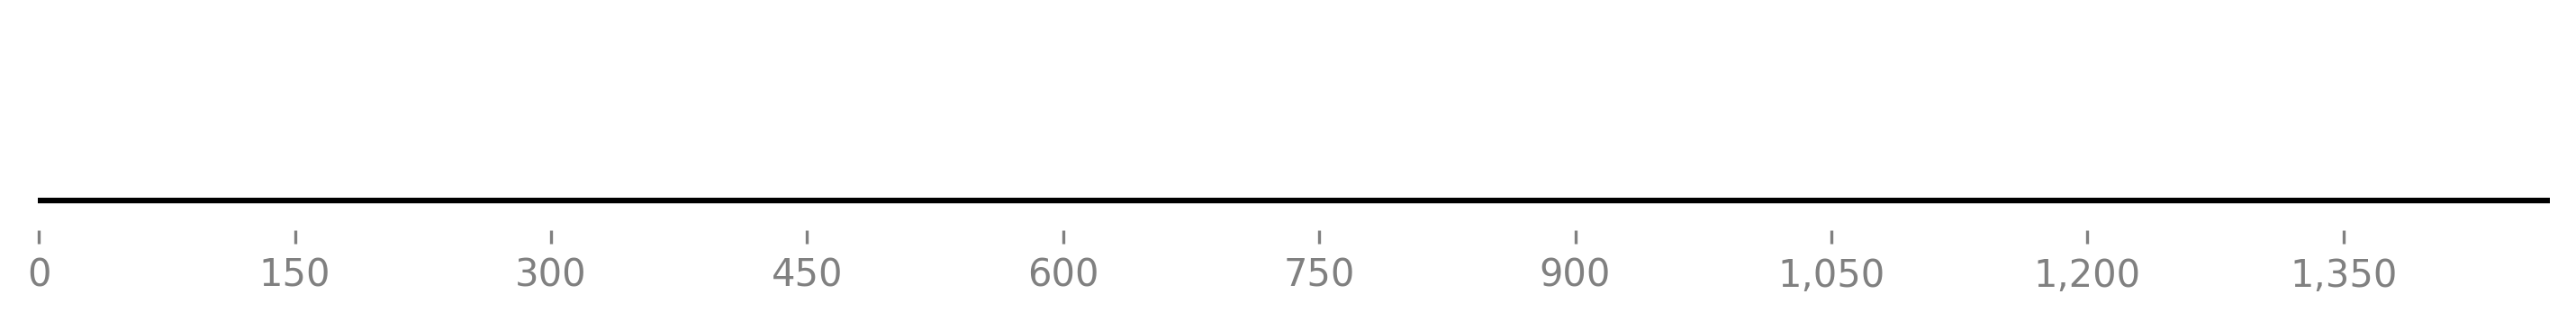

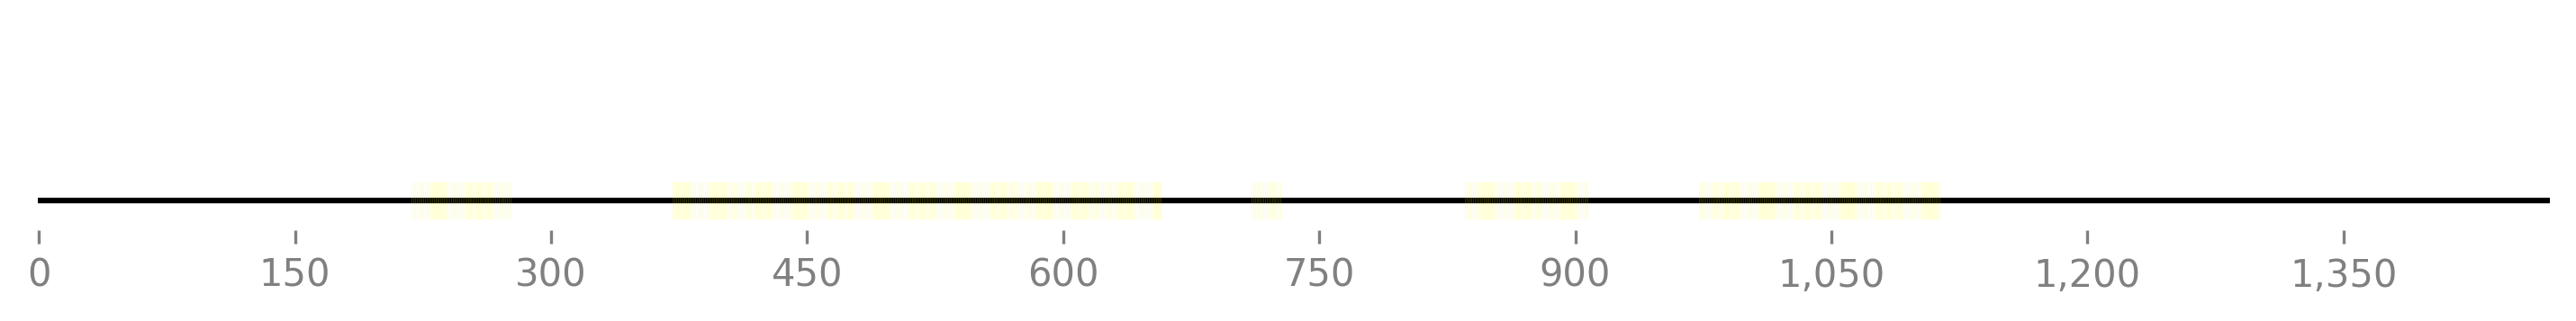

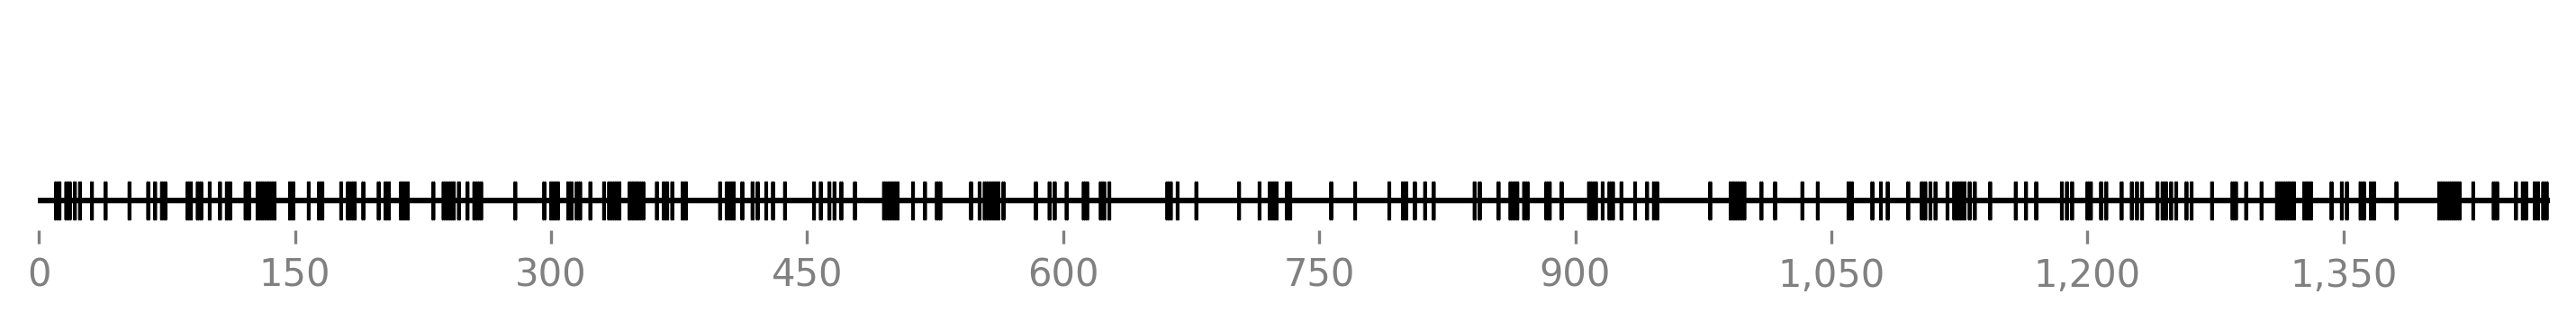

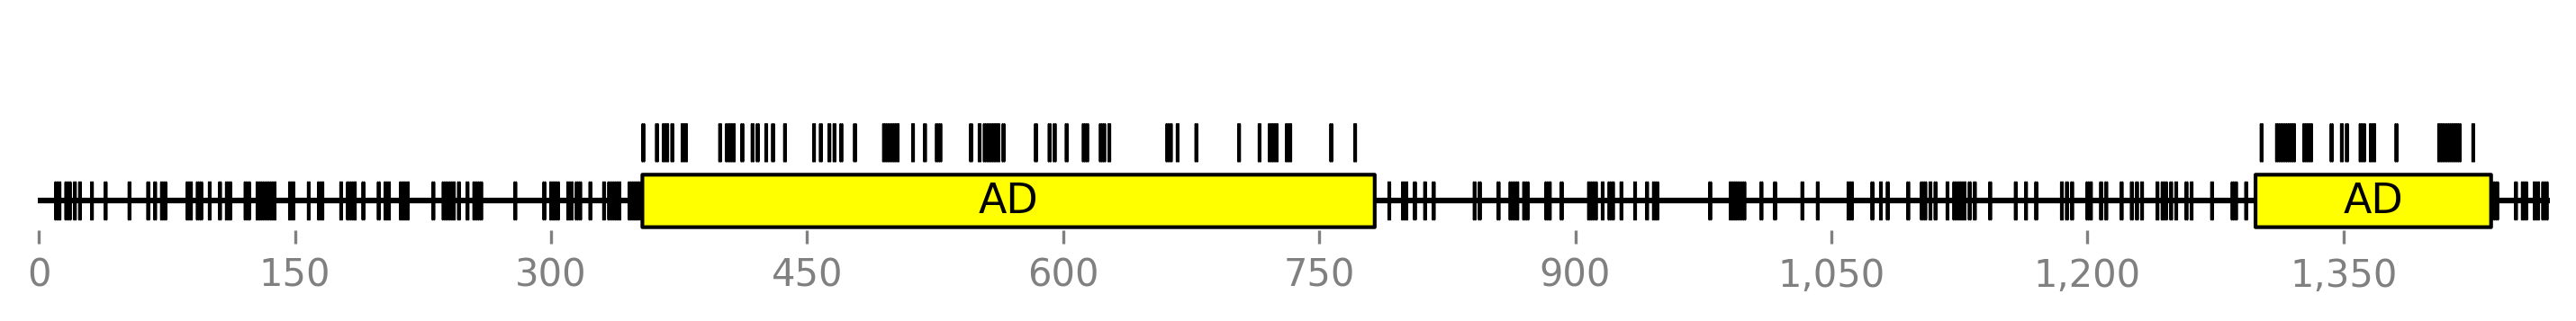

In [56]:
# ERG
plot("P11308")

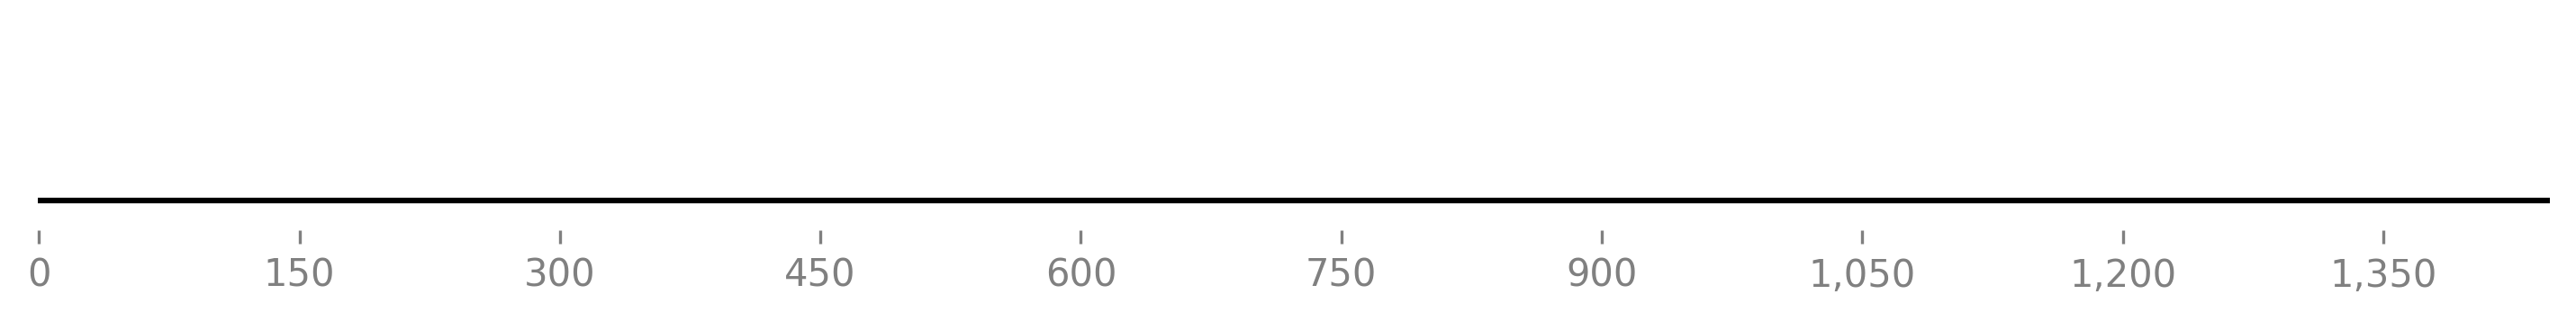

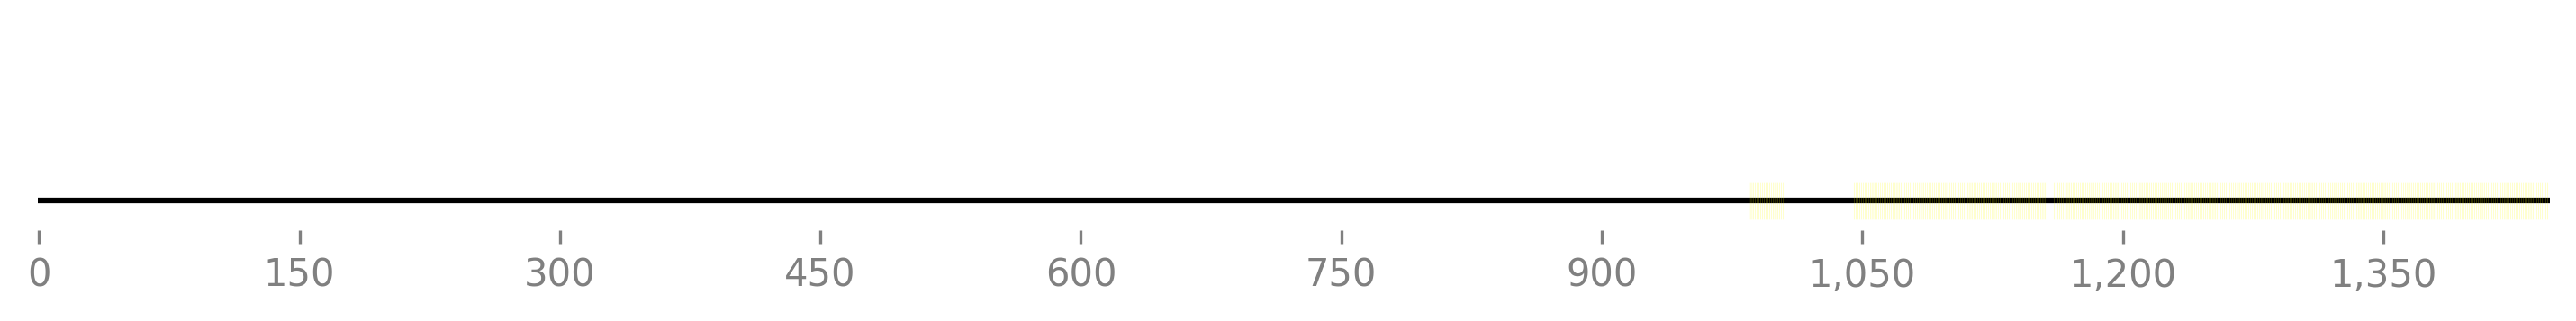

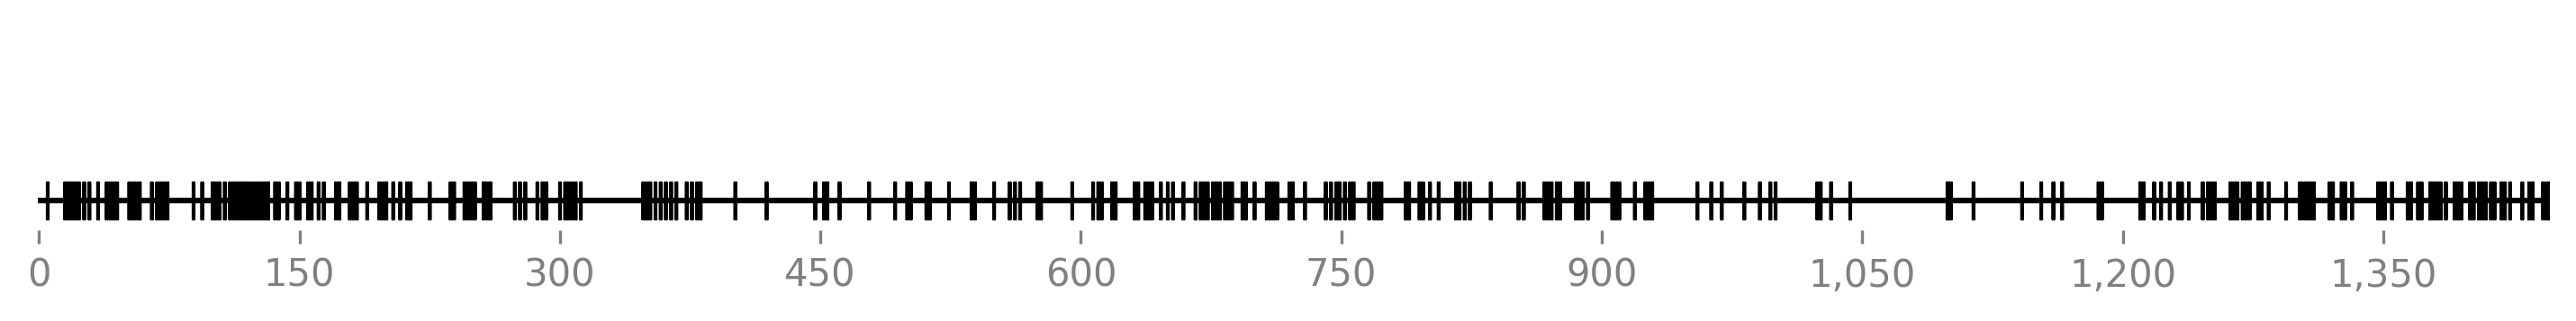

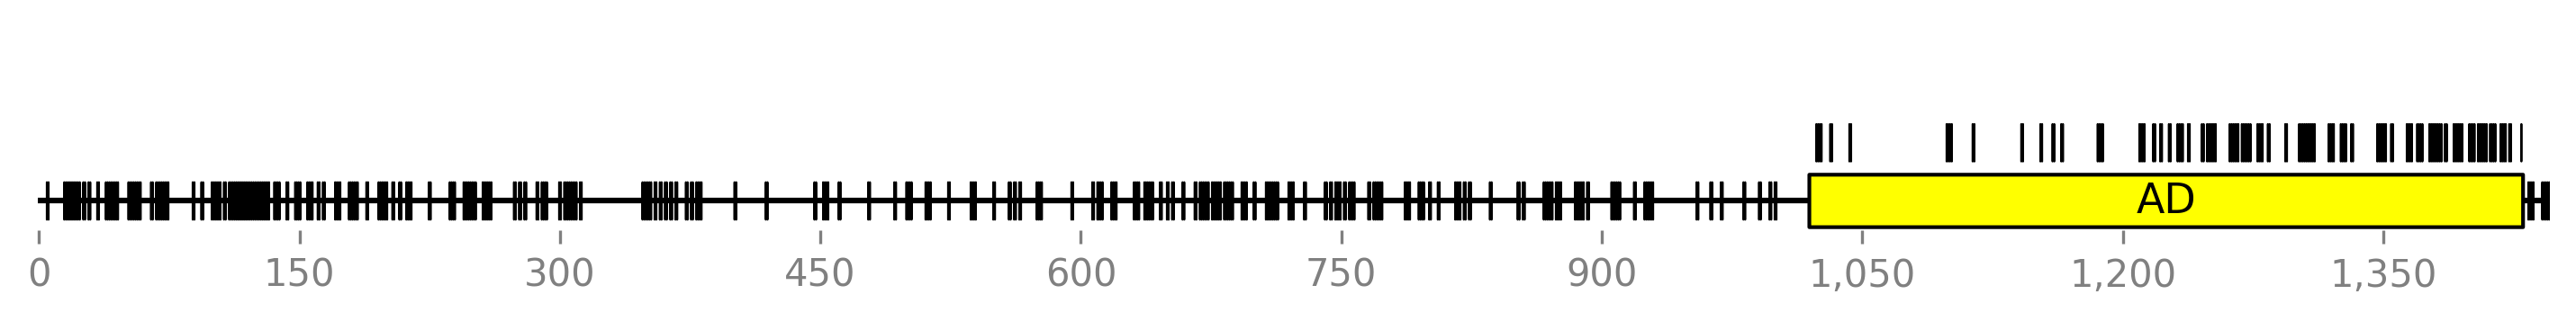

In [57]:
# MEIS2
plot("O14770")

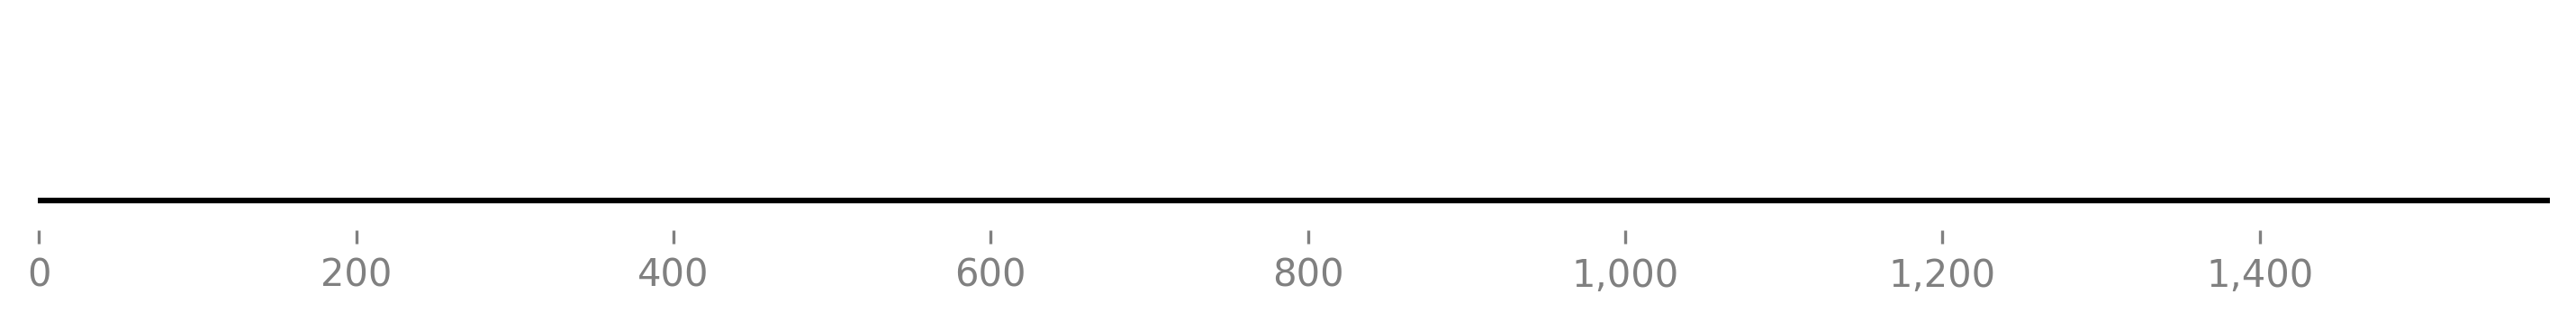

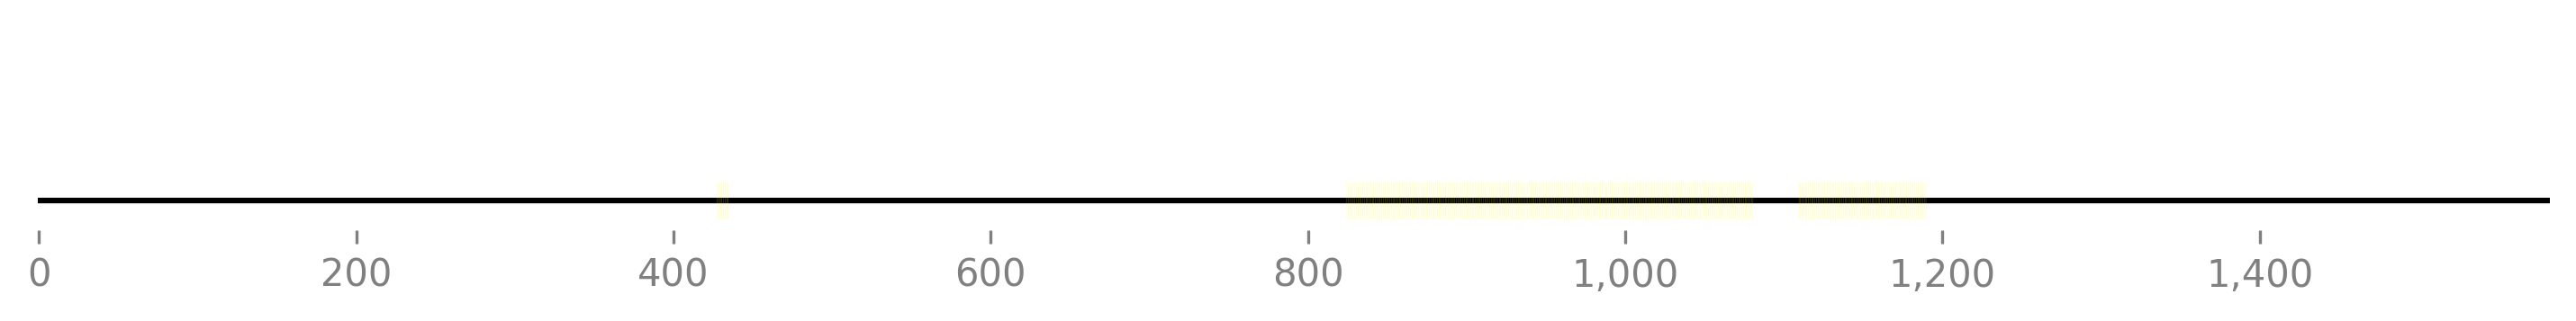

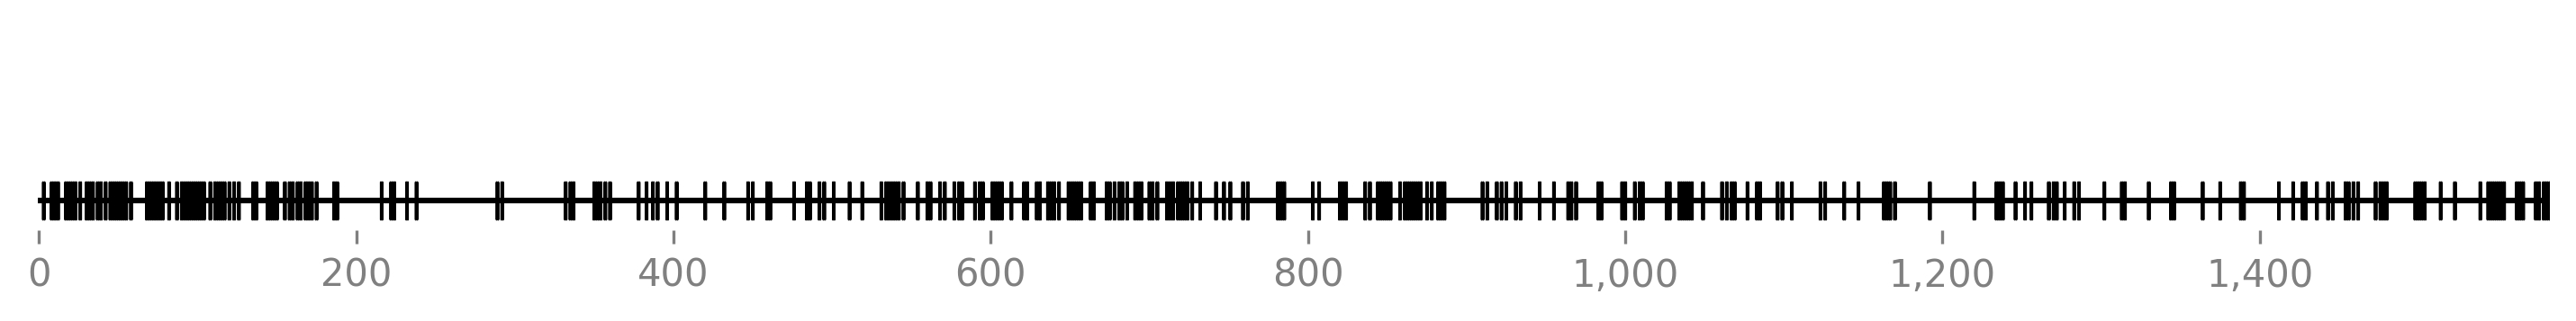

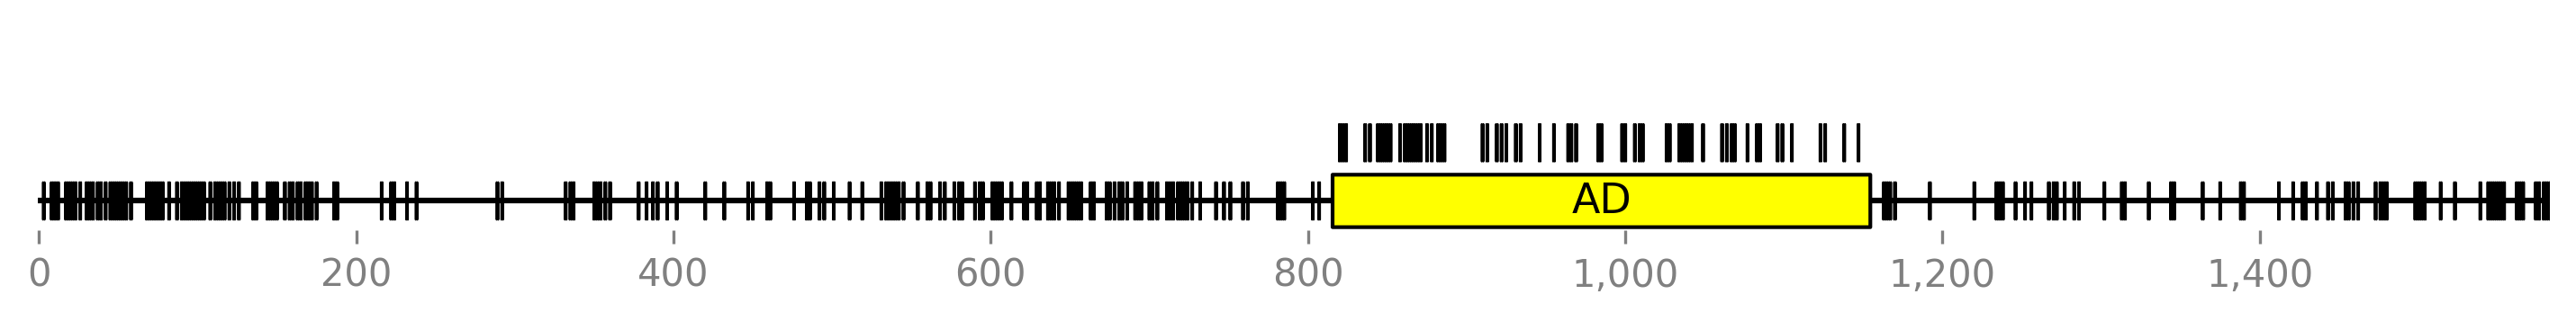

In [58]:
#RORA
plot("P35398")

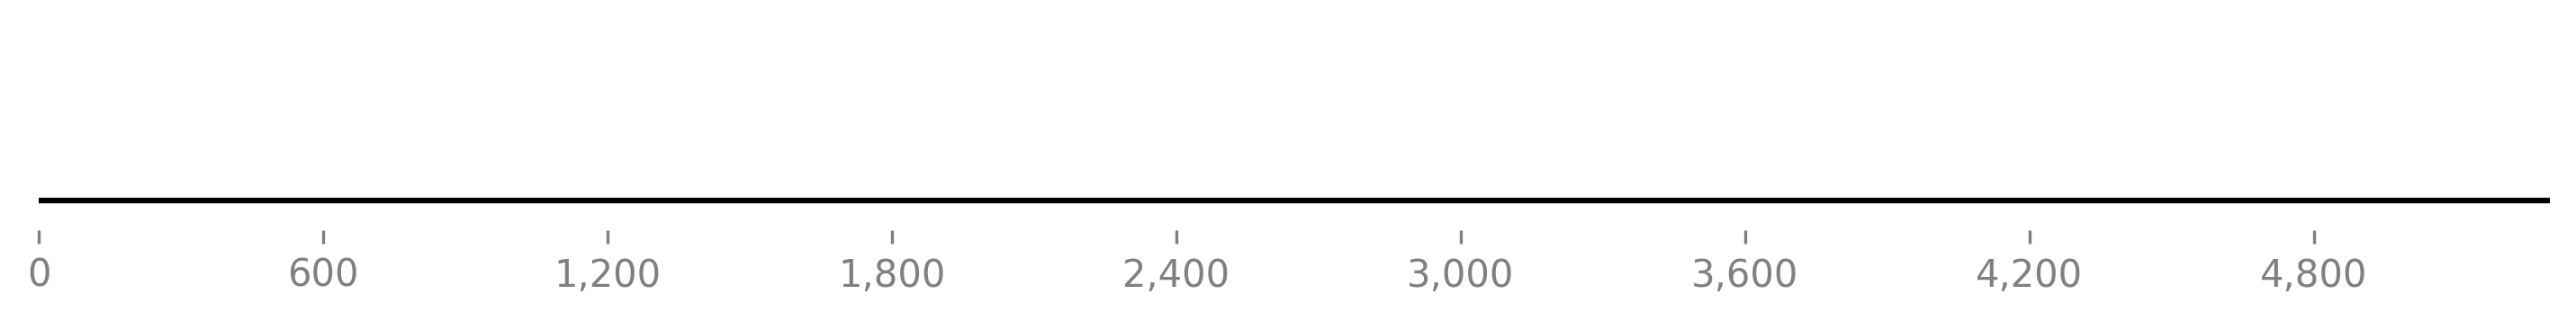

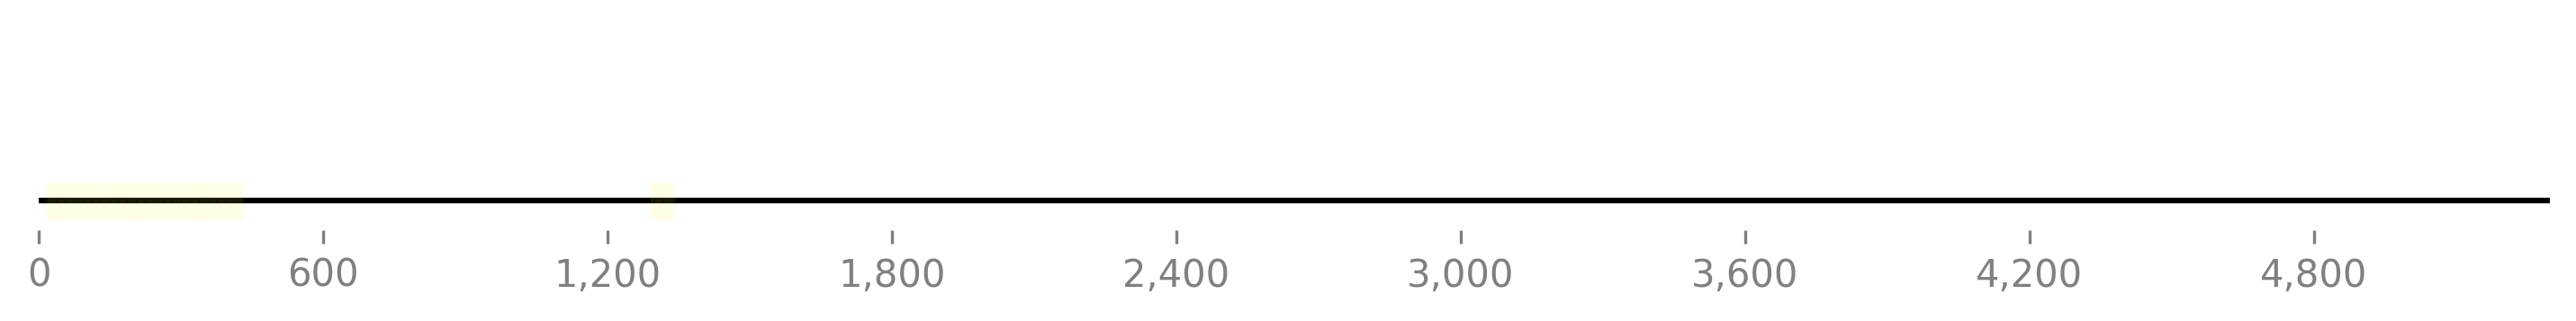

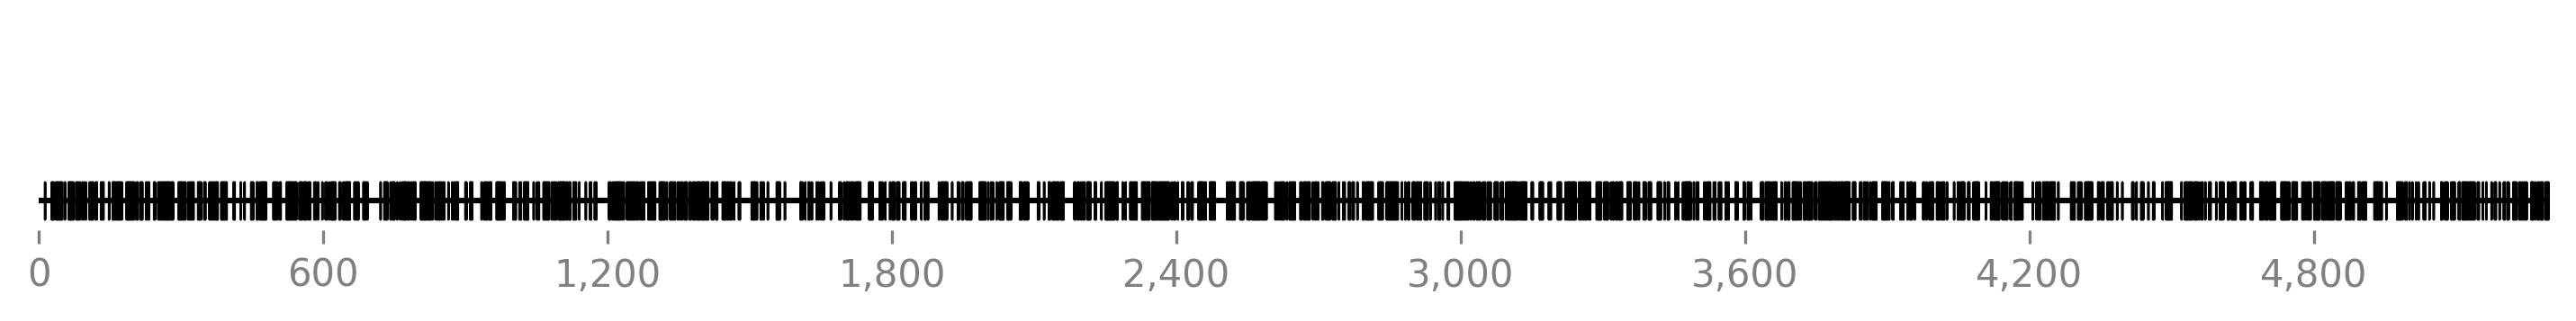

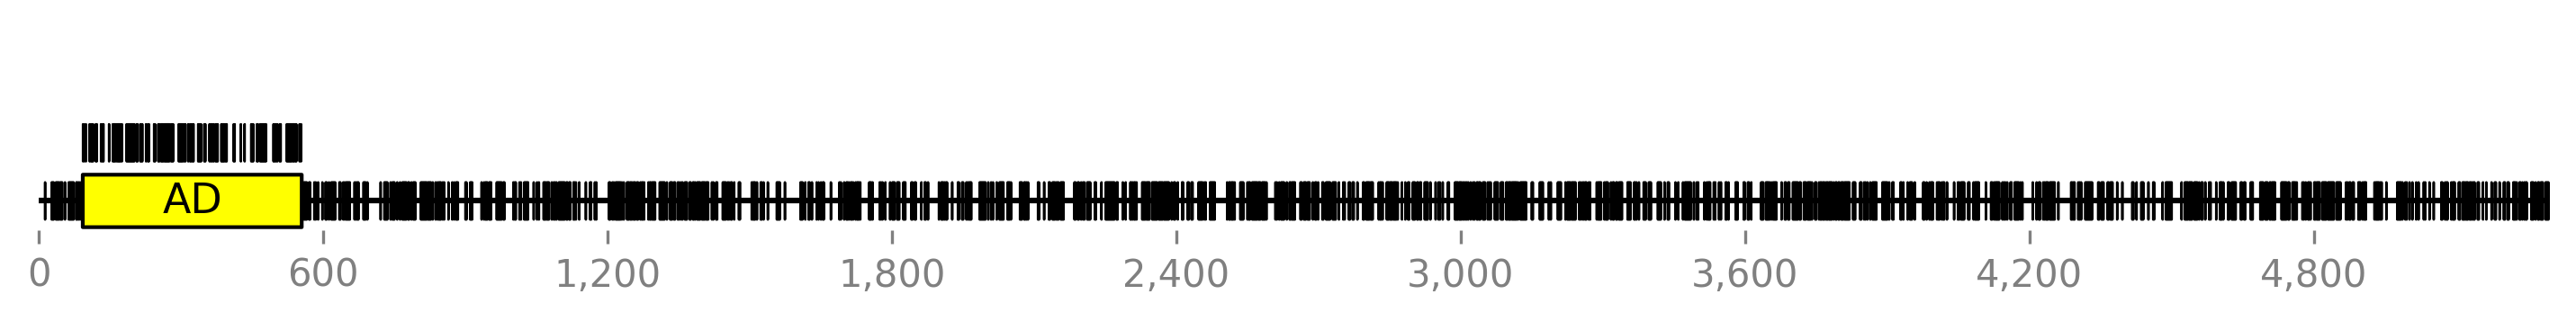

In [59]:
# CASZ1
plot("Q86V15")

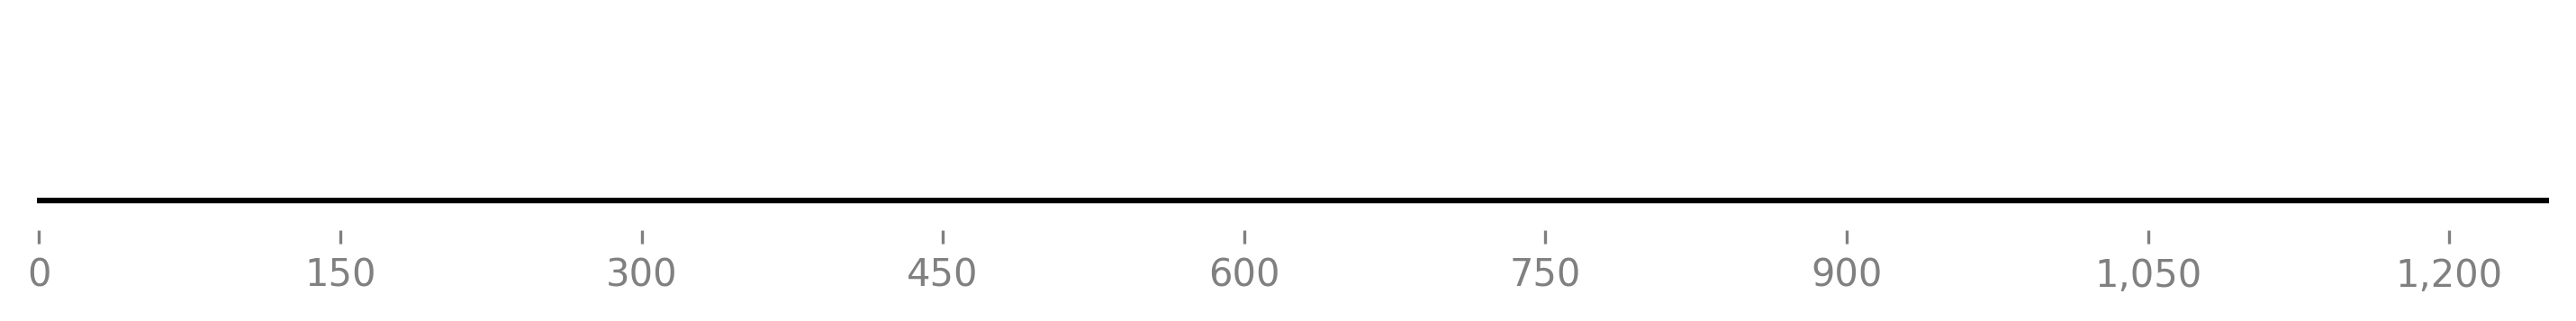

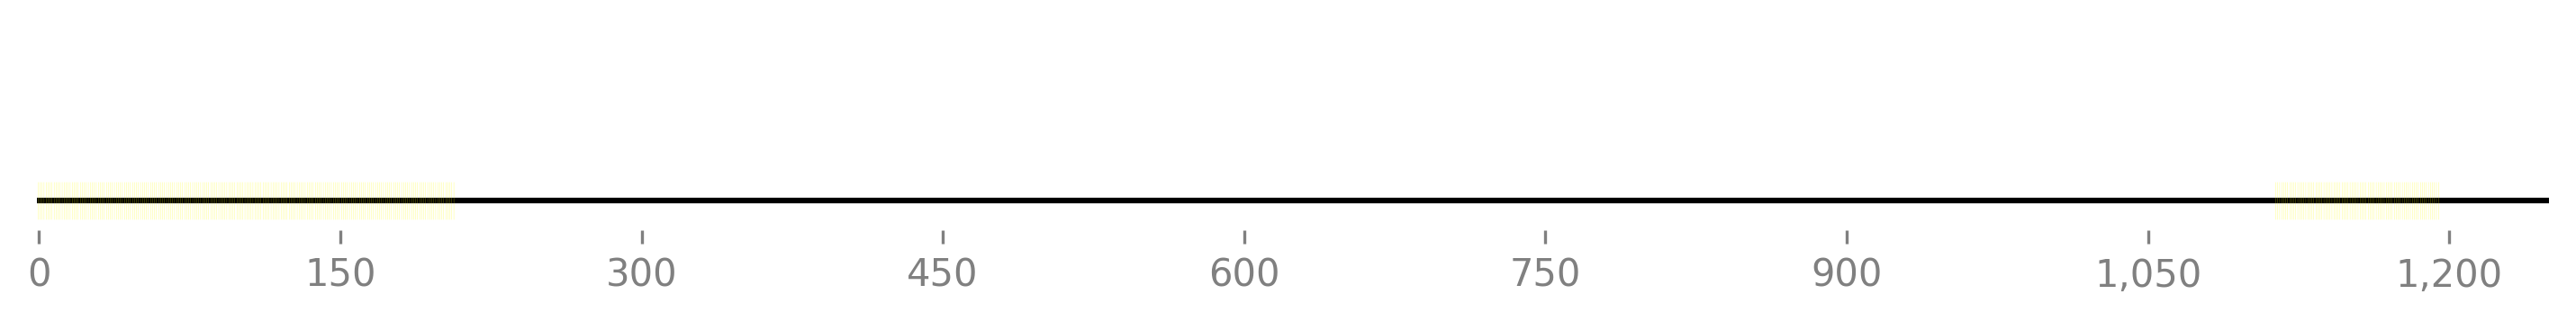

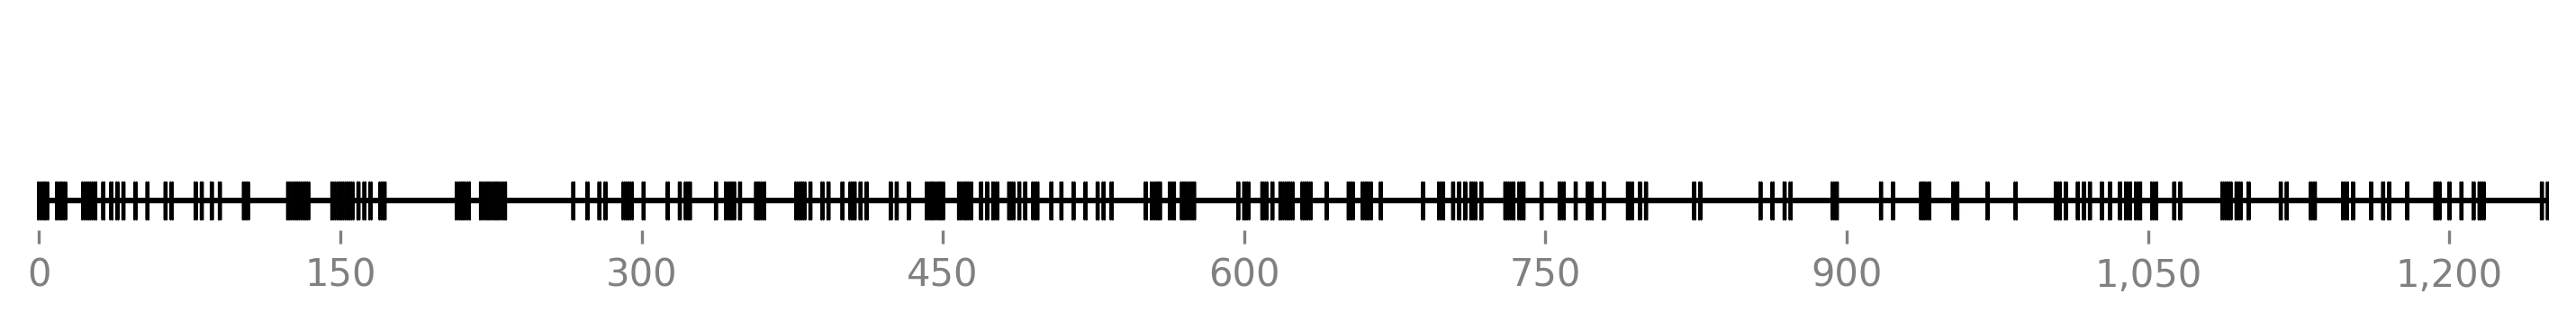

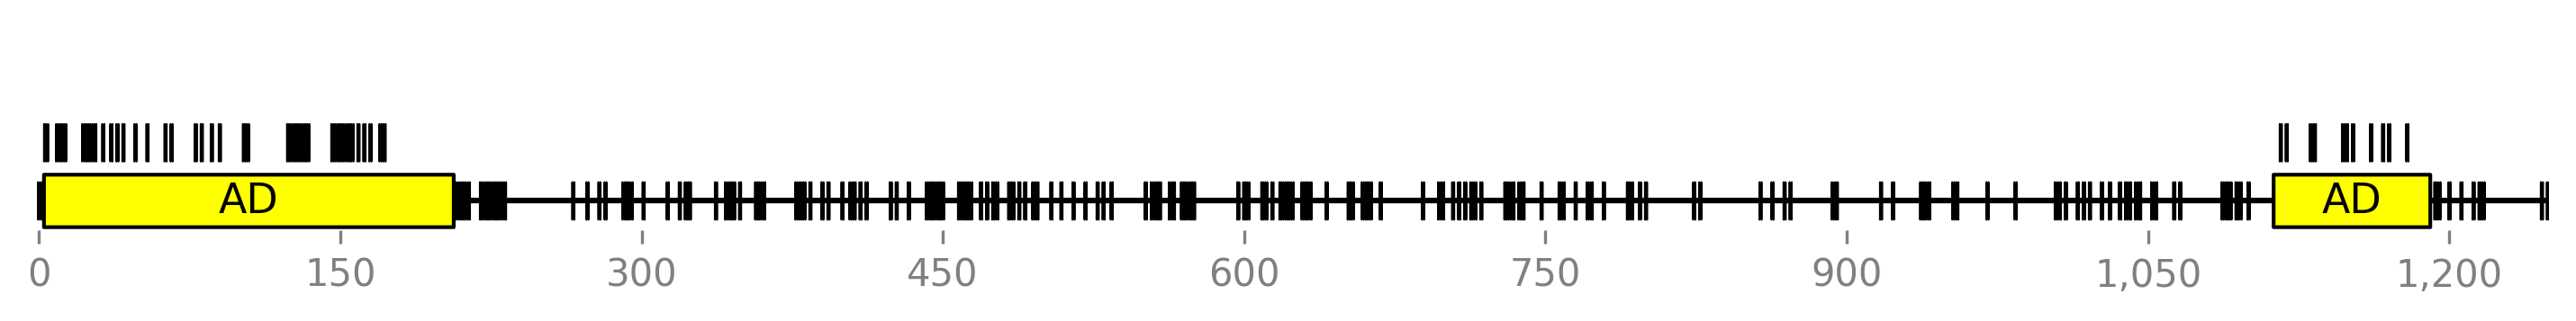

In [60]:
# YY1
plot("P25490")

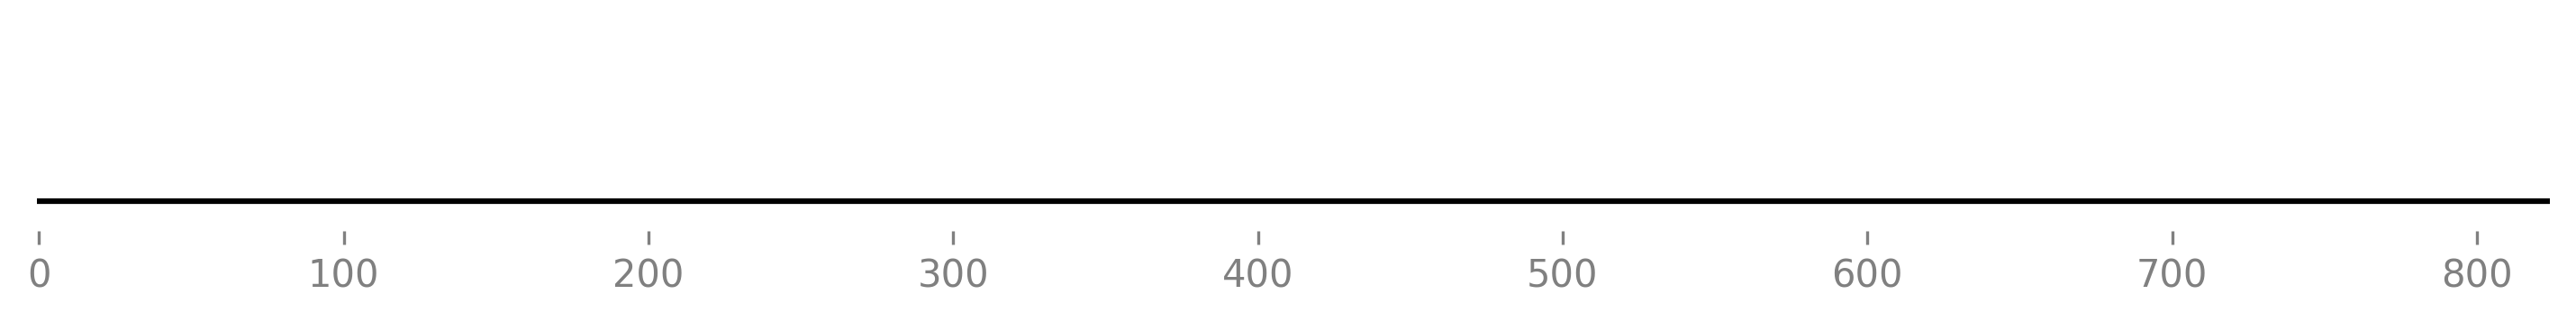

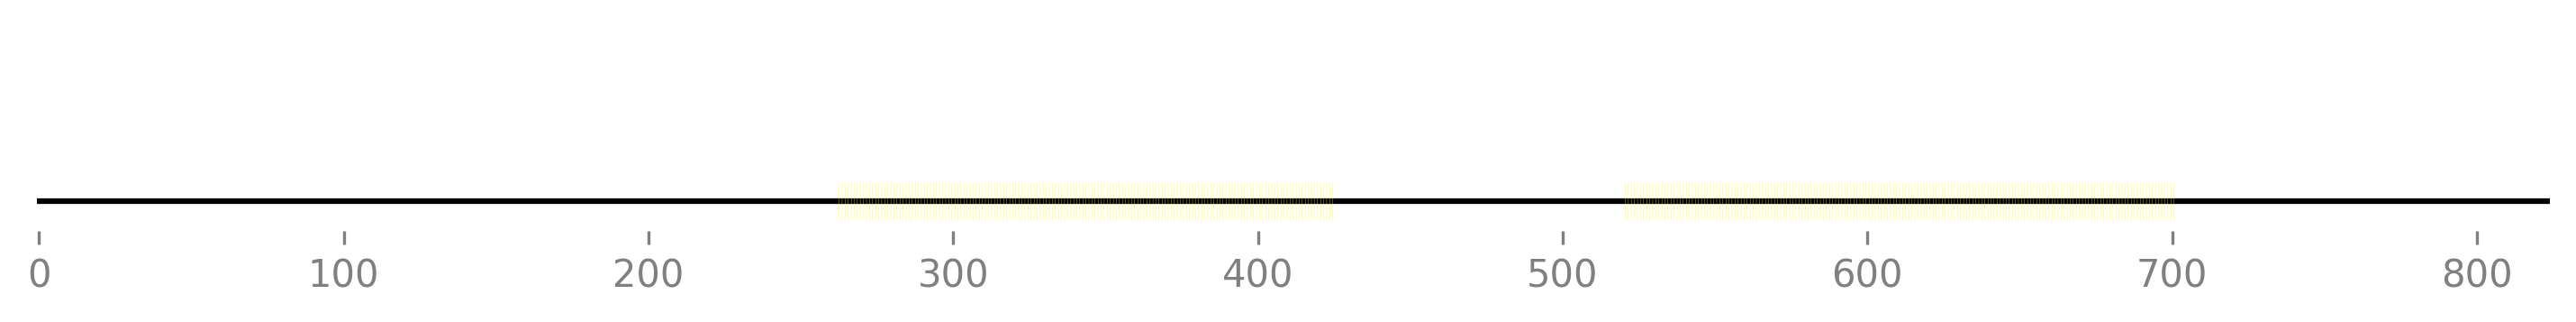

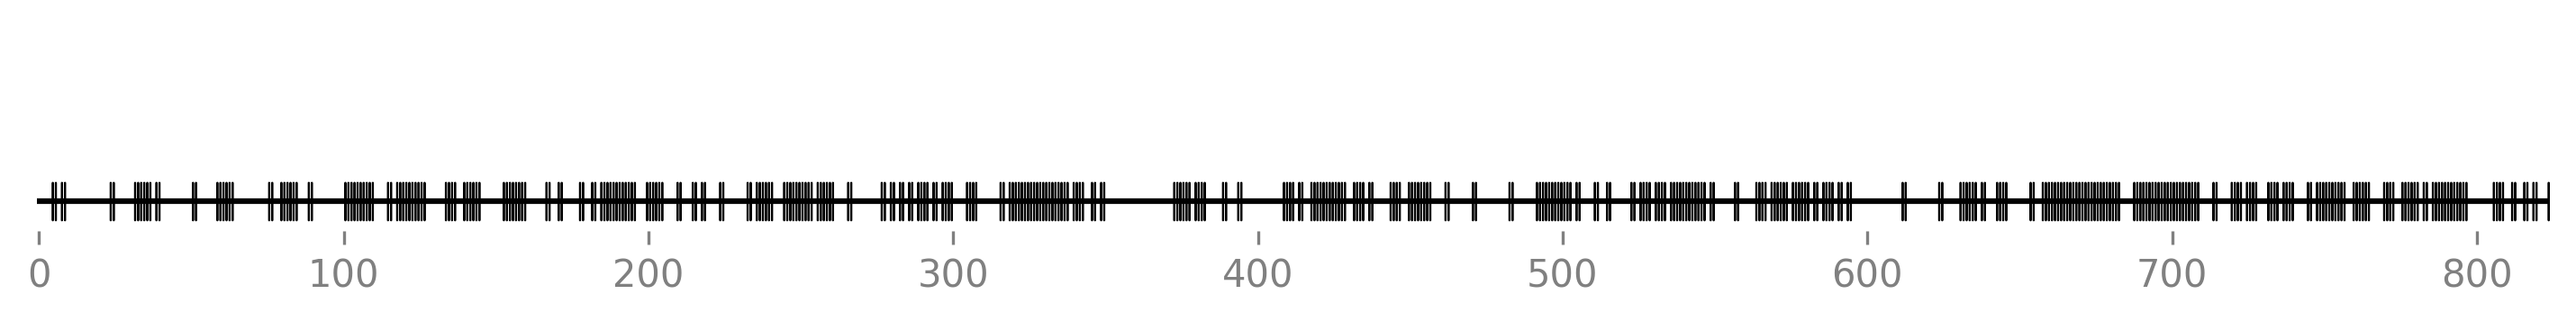

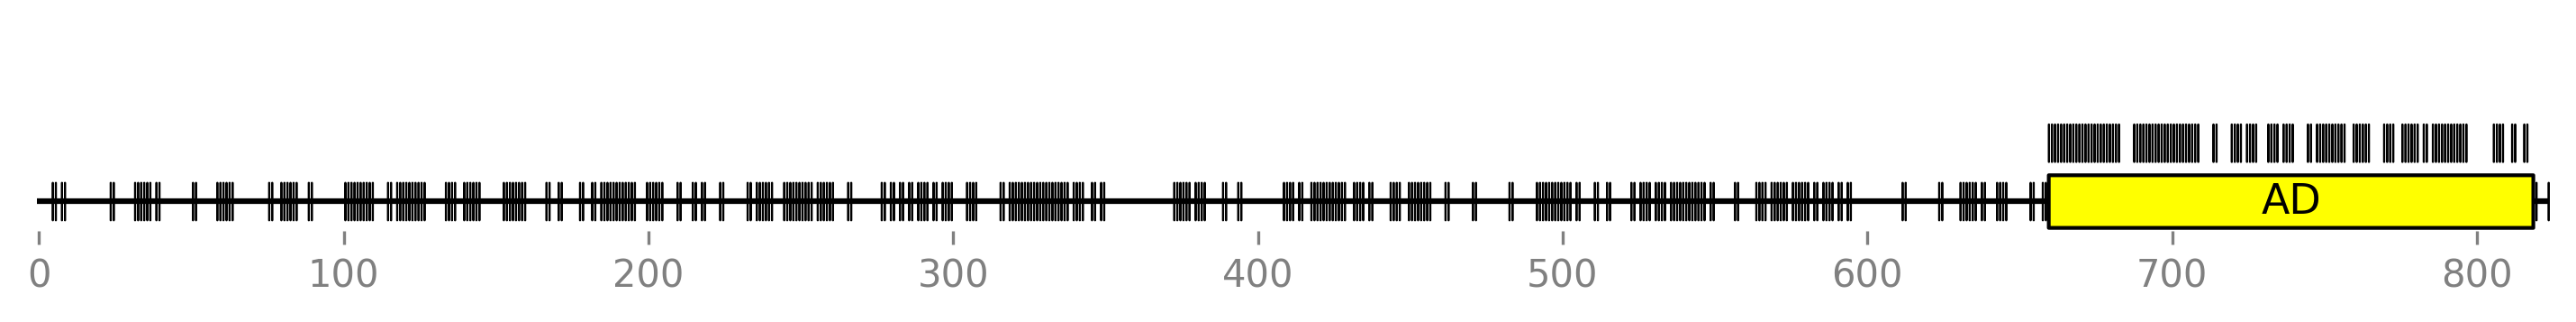

In [6]:
# NKX2-2	
plot("O95096")

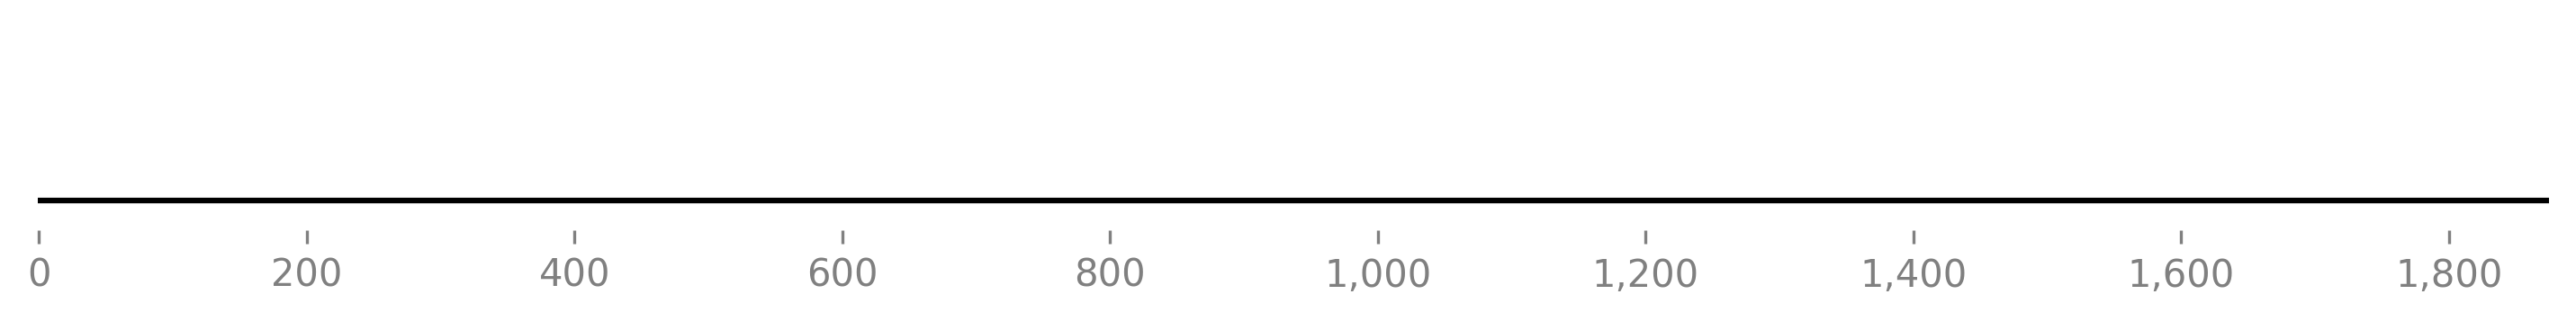

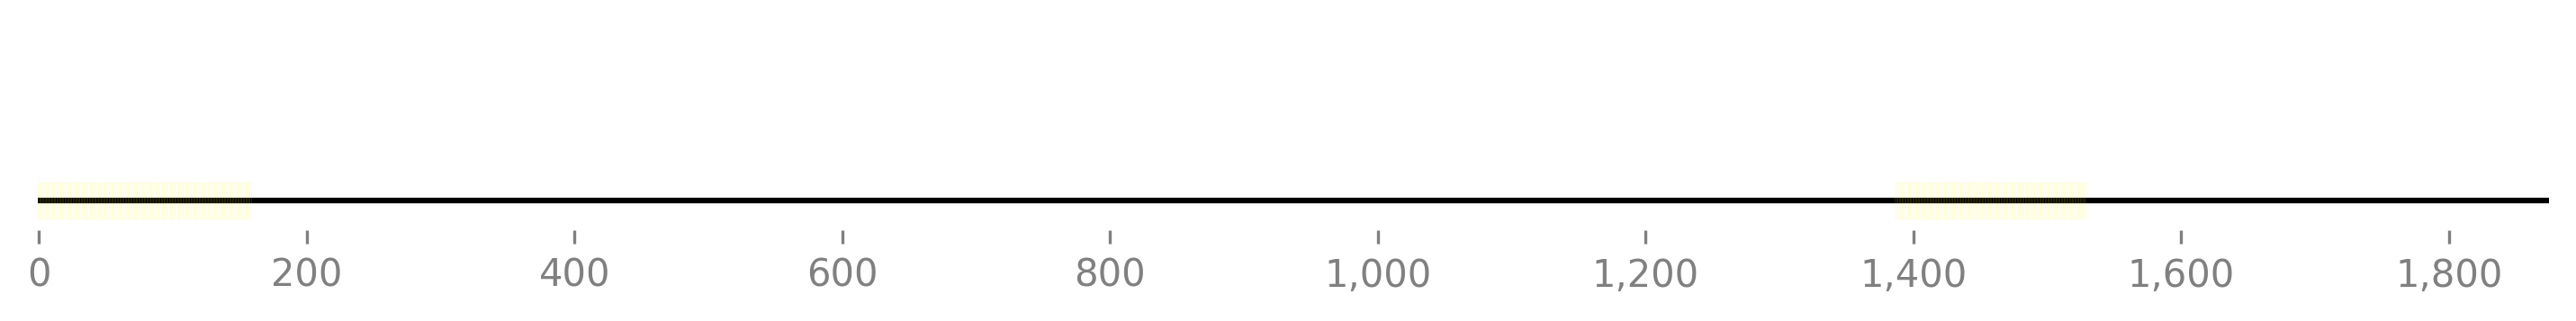

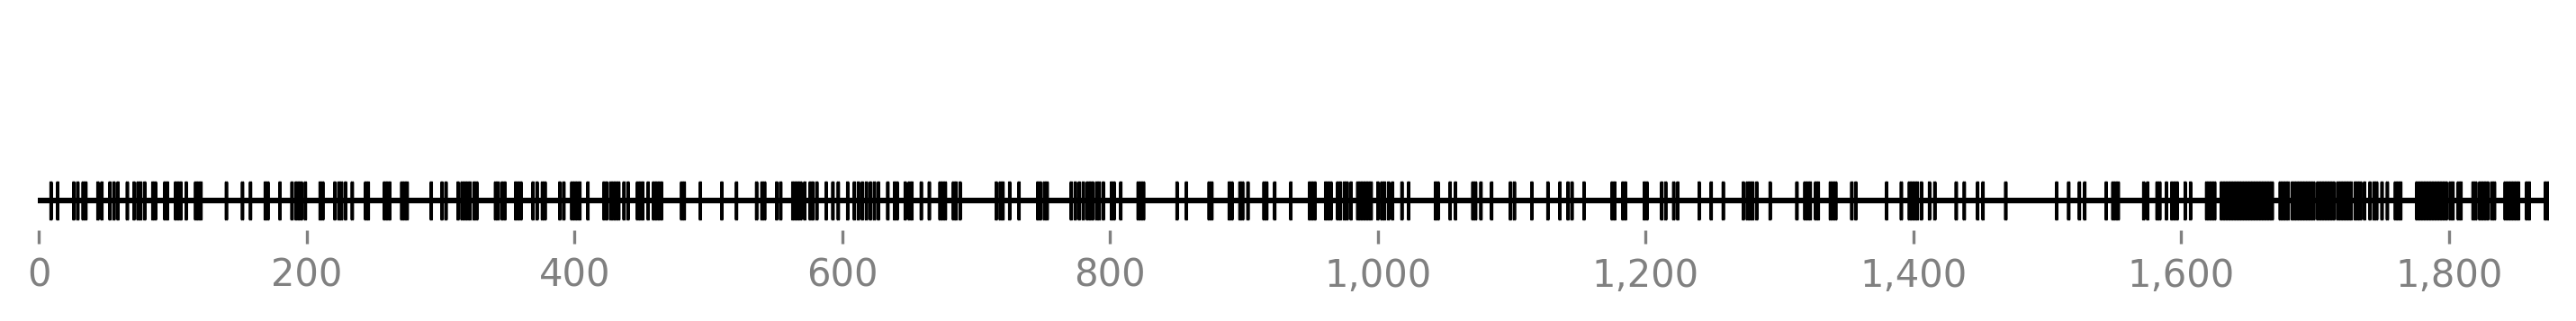

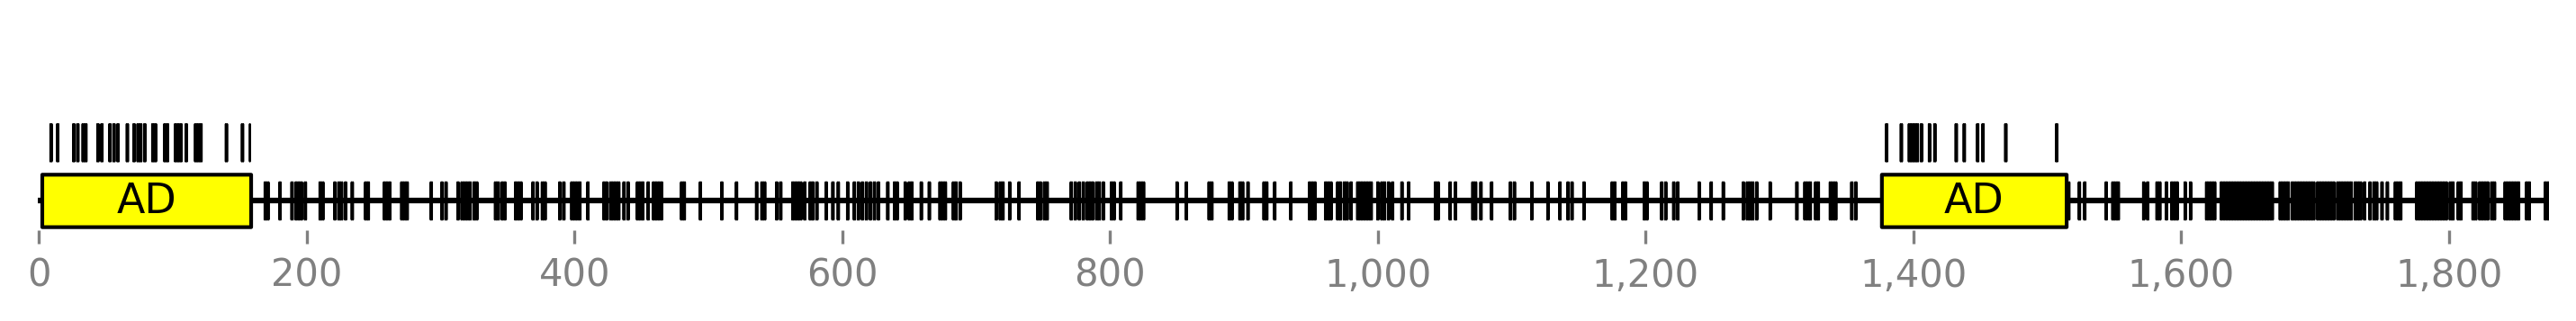

In [62]:
# TCF7L2
plot("Q9NQB0")

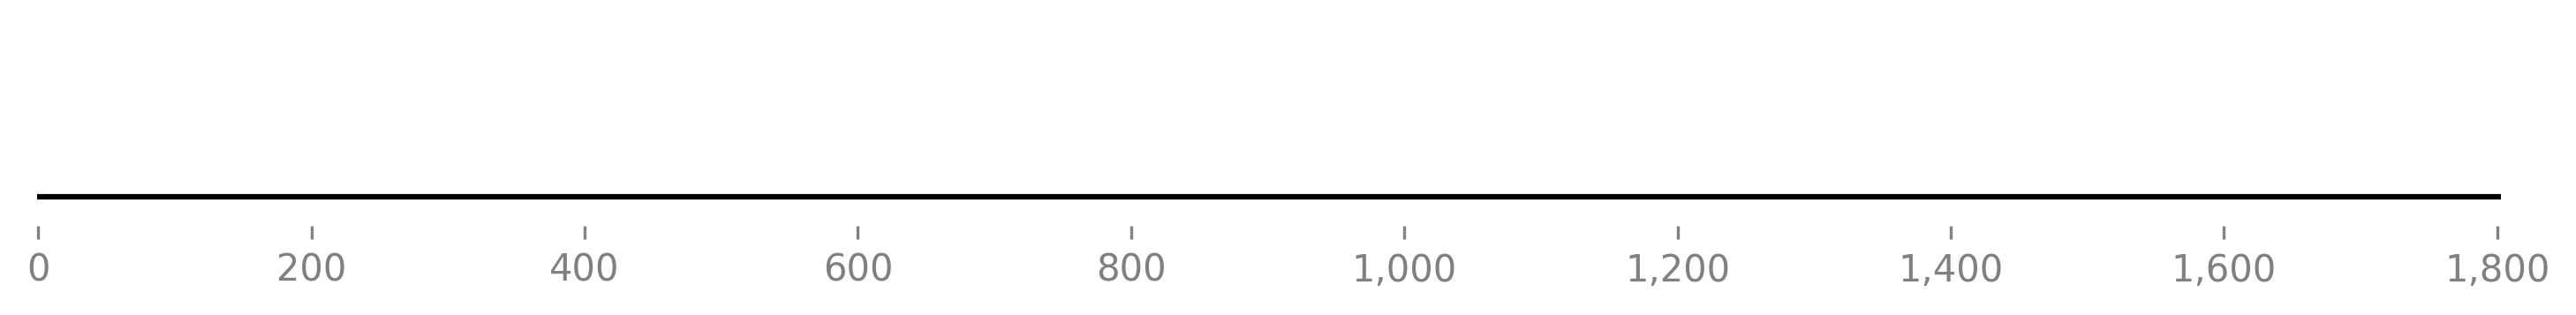

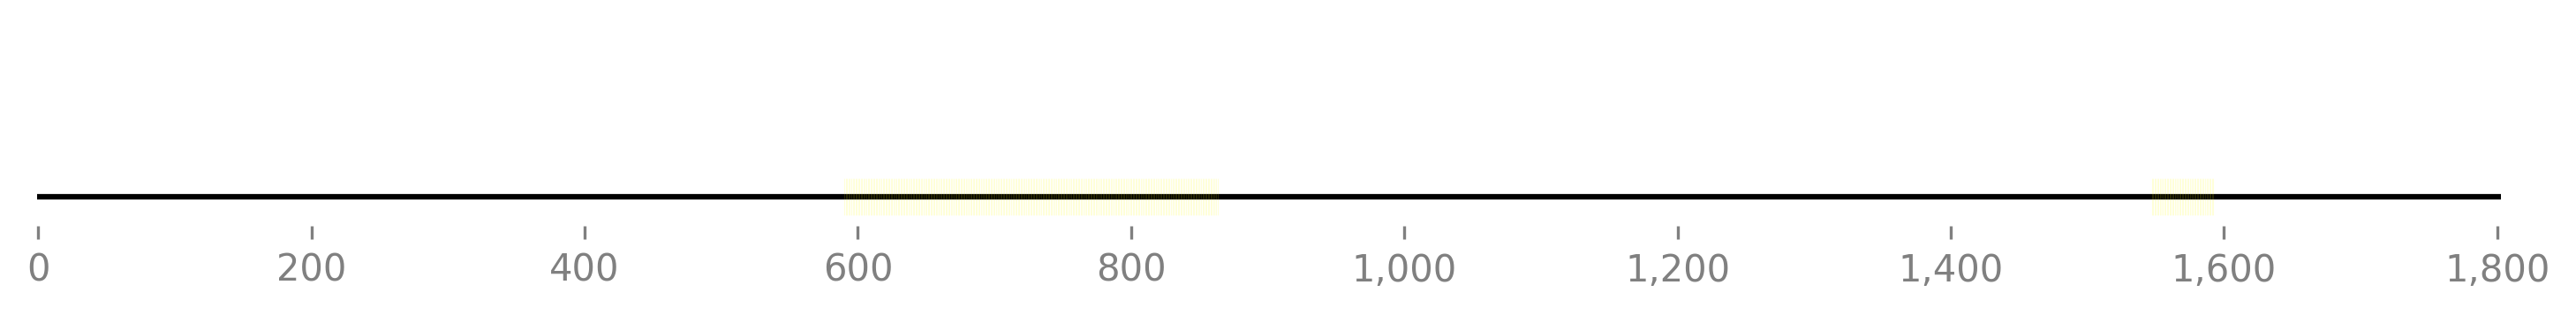

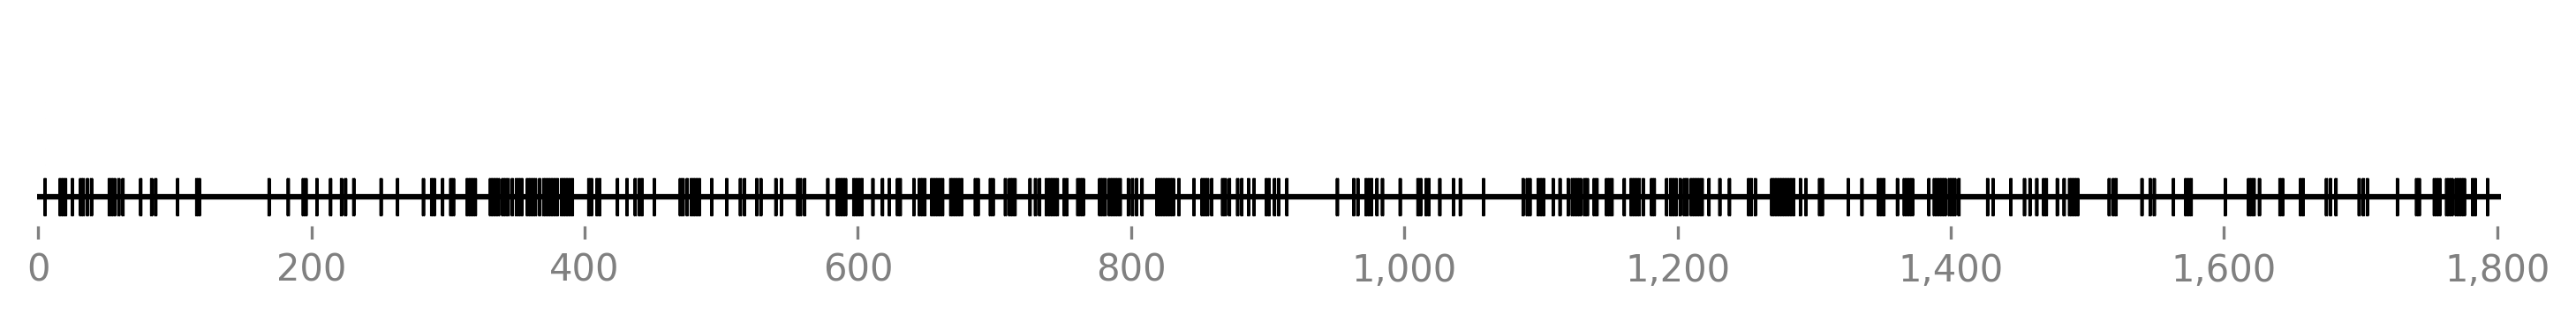

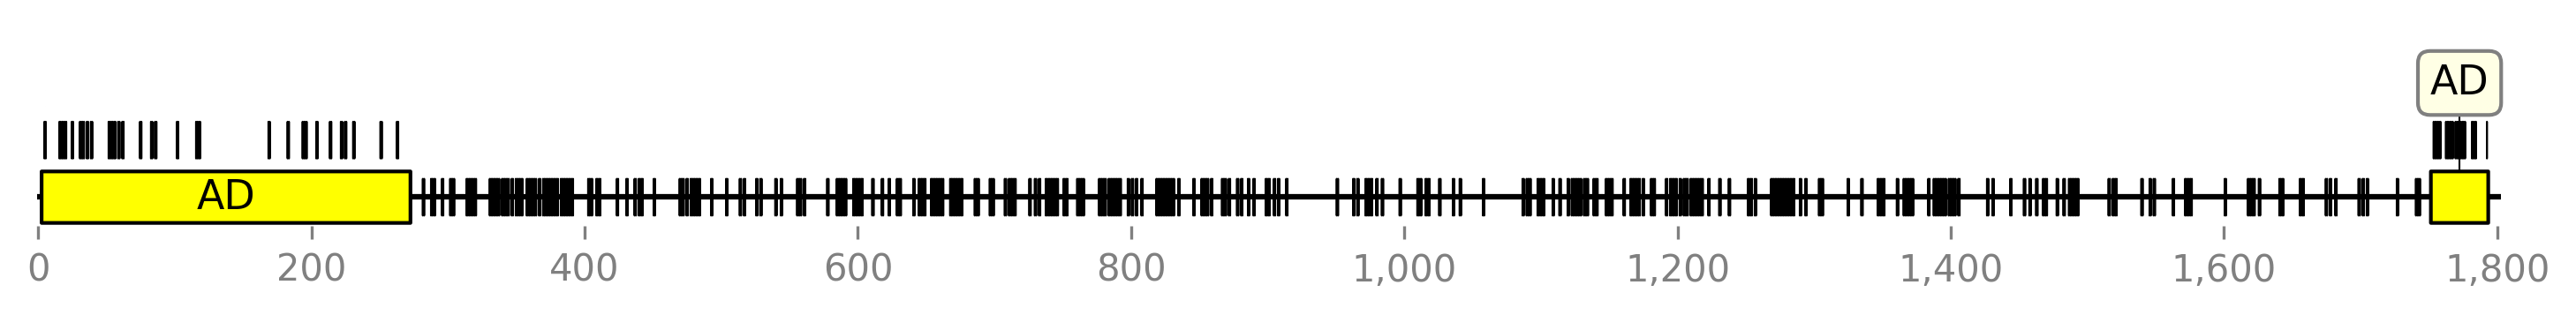

In [63]:
# NR4A2
plot("P43354")

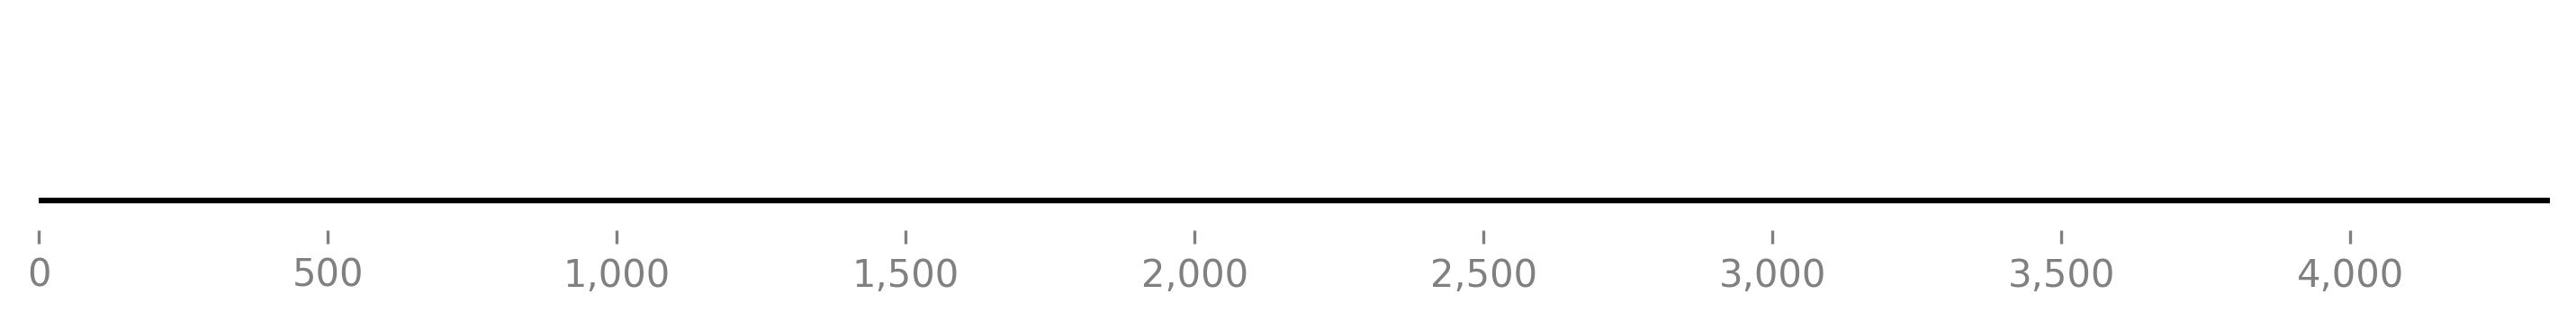

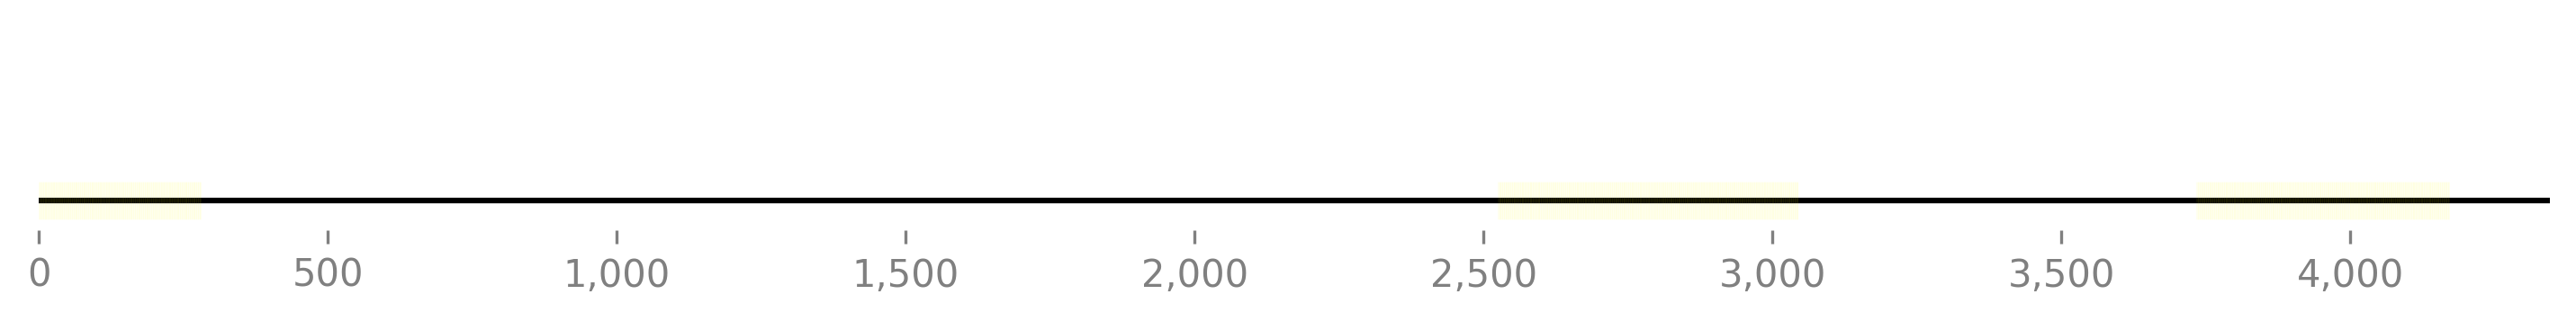

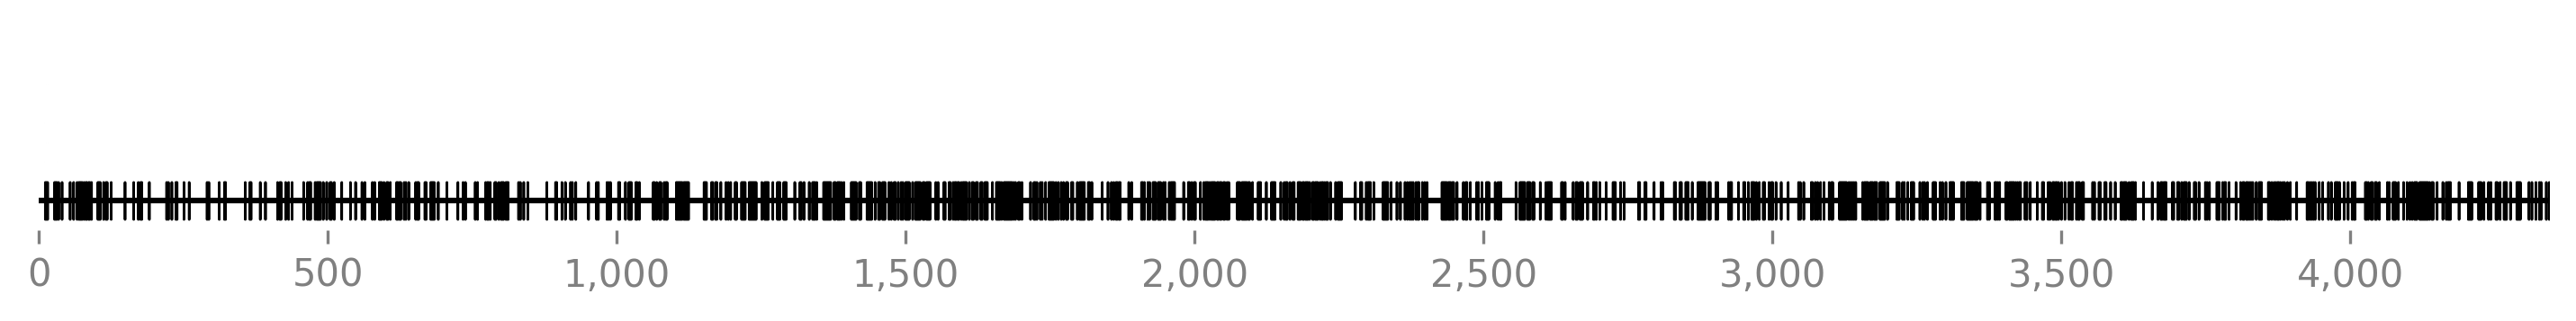

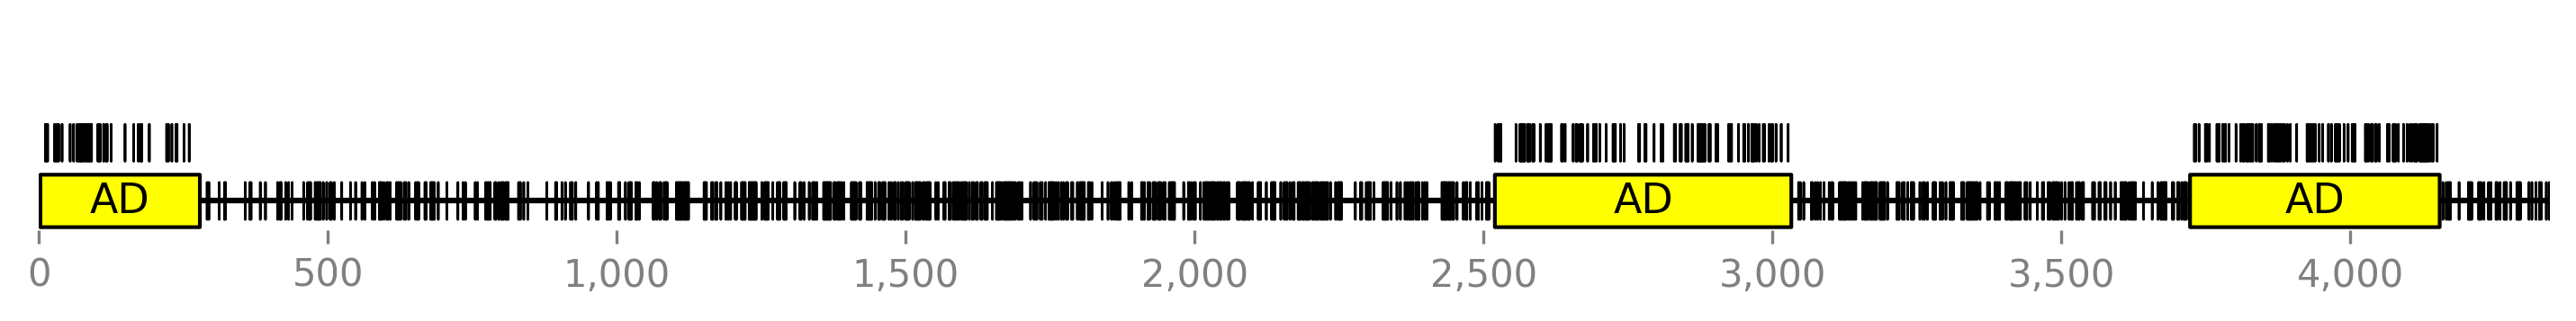

In [64]:
# NCOA1
plot("Q15788")

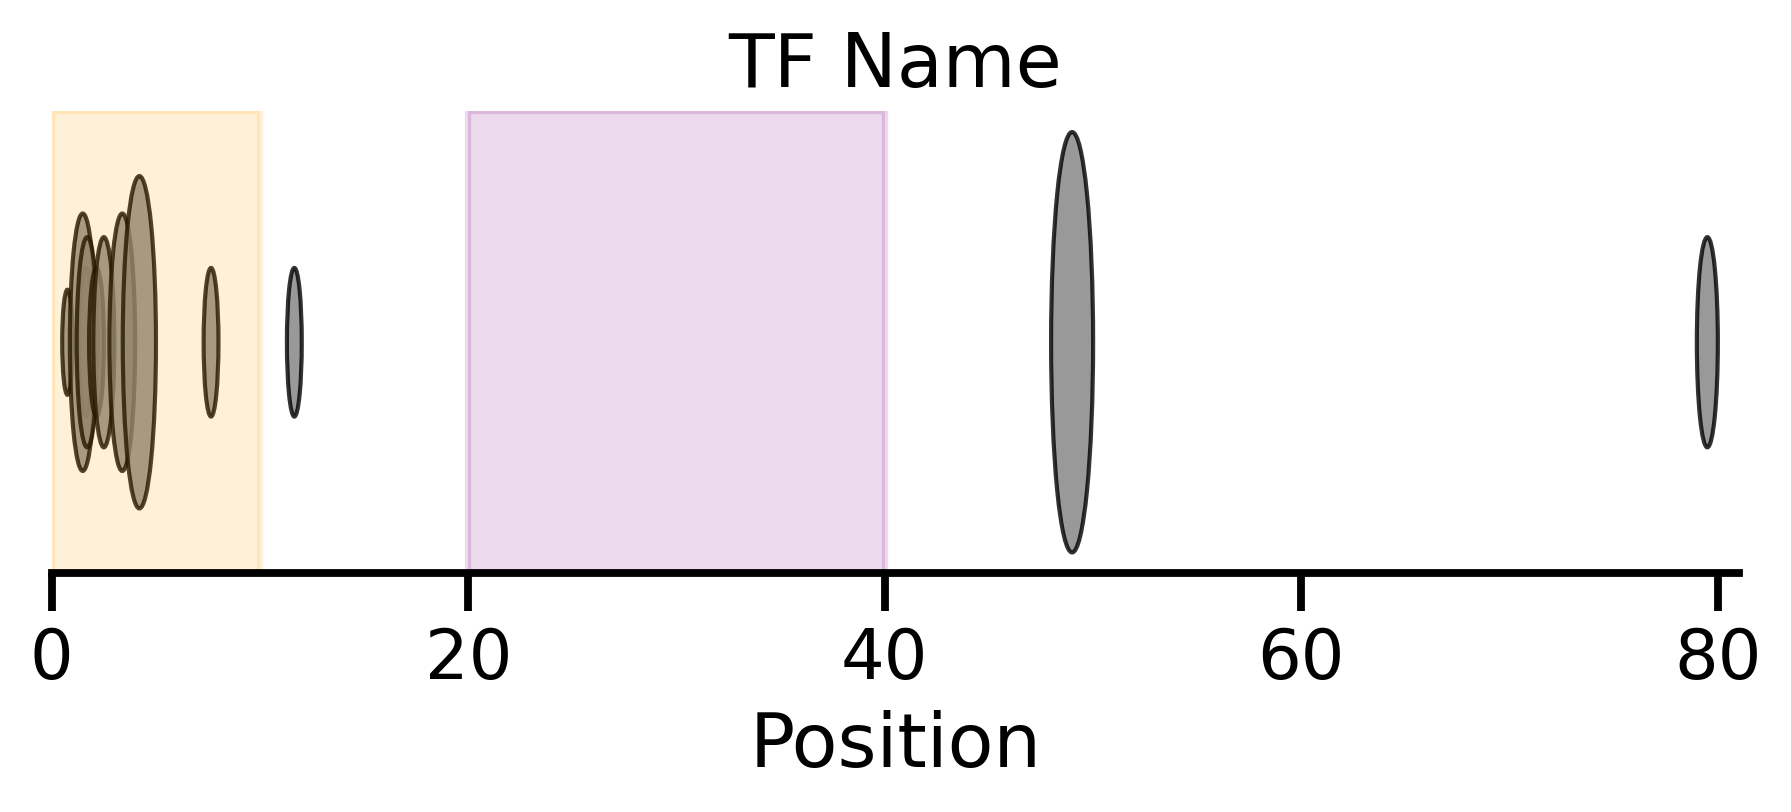

In [94]:
#Idea 11/19/24
# Inspired by genome browser
# Use circles for variants

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns
import numpy as np



def plot_ovals(positions, heights):
    sns.set_context('talk')
    fig, ax = plt.subplots(figsize=(10, 2), dpi = 300)
    
    # Draw the number line through the vertical centers of the ovals
    #ax.axhline(0, color='black', linewidth=2, linestyle='-')  # Number line

    heights = np.array(heights) * 2 # Control how spread out
    
    for position, height in zip(positions, heights):
        # Create an ellipse for each position and size
        #print(position)
        ellipse = Ellipse((position - (height * 0.1) / 2, 0), width=height * 0.1, height=height, edgecolor='black', facecolor='gray', lw=1, alpha = 0.8)
        ax.add_patch(ellipse)
    
    # Calculate the max width and height from the sizes
    #max_width = max(heights)
    max_height = max(heights)
    
    # Adjust x-axis and y-axis limits for better visualization
    ax.set_xlim(min(positions) - 1, max(positions) + 1)
    ax.set_ylim(-max_height / 2 - 1, max_height / 2 + 1)  # Adjust y-axis to fit the ovals
    #plt.axhline(0, color = "gray", alpha = 0.5)
    
    ax.set_aspect('equal')  # Ensure the ovals are not distorted
    ax.set_yticks([])  # No y-axis ticks
    ax.set_xlabel("Position")
    plt.title("TF Name")
    sns.despine(left = True)

   

def return_height(num_vars):
    # 1 variant = 
    # num_vars = pi * height / 2 * width  / 2
    # num_vars = pi * height / 2 * height / 2 * 0.1 
    # num_vars = 0.1 * pi * (height / 2) ^2
    # height = 2 * np.sqrt(num_vars / (0.1* pi)
    return 2 * np.sqrt(num_vars / (0.1 * np.pi))

def plot_using_num_vars(positions, num_vars):
    plot_ovals(positions, [return_height(_) for _ in num_vars])
    
# Example input
positions = [1,2,2.1,2.2, 2.5, 3,4, 5, 8, 12, 50, 80]  # Positions along the number line
num_vars = [0.5, 1,3, 2, 1, 2,3,5,1,1, 8, 2]  # (width, height) for each oval

plot_using_num_vars(positions, num_vars)
plt.axvspan(0,10, color = "orange", alpha = 0.15)
plt.axvspan(20, 40, color = "purple", alpha = 0.15)
plt.show()

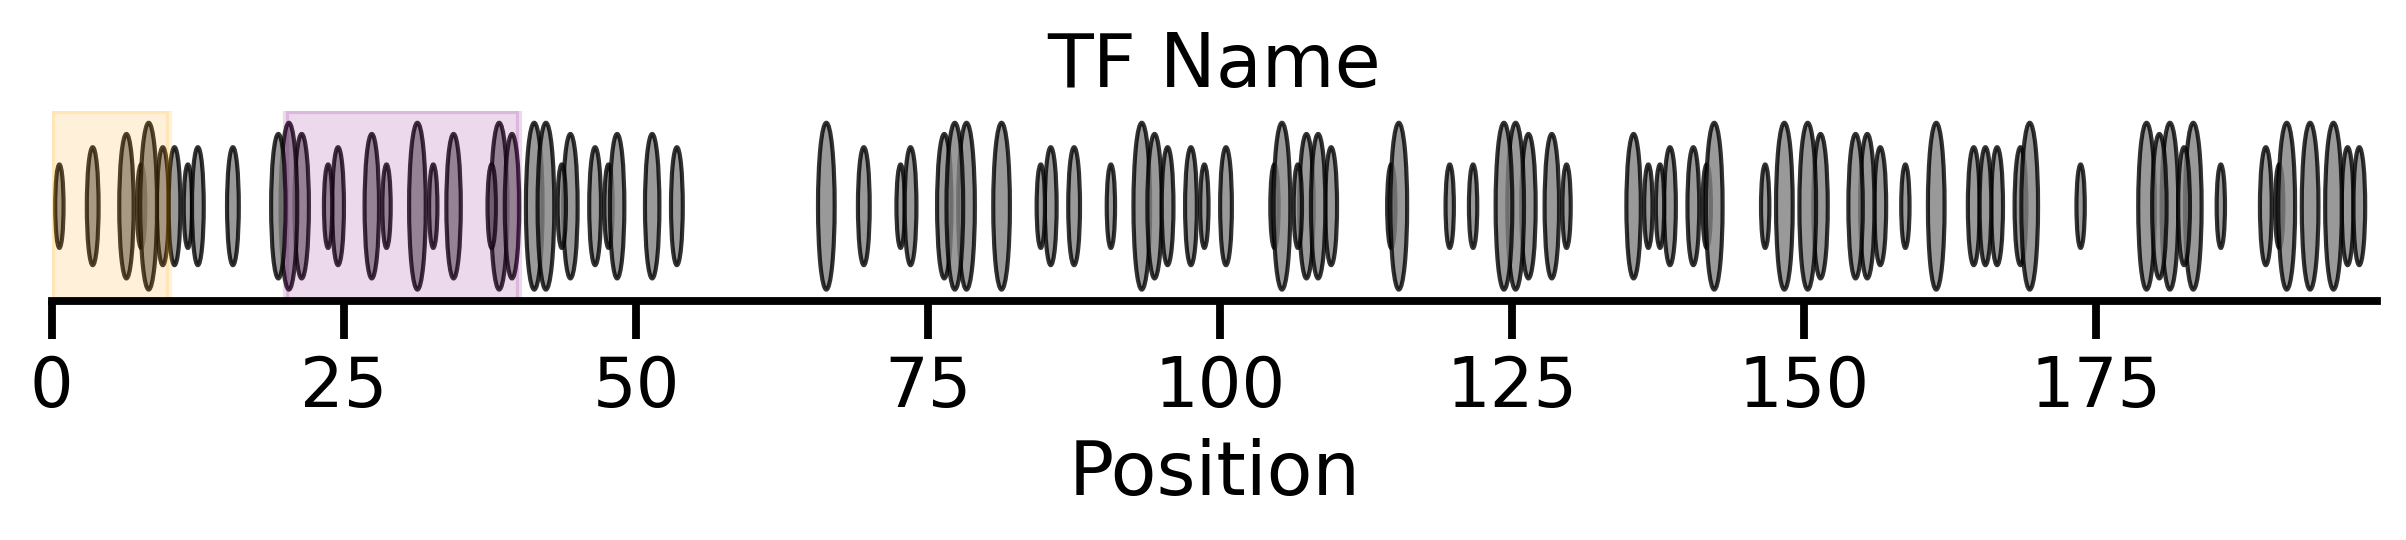

In [96]:
# Example input
import random
positions = random.sample(range(1, 200), 100)
num_vars = [random.randint(1, 4) for _ in range(100)]


plot_using_num_vars(positions, num_vars)
plt.axvspan(0,10, color = "orange", alpha = 0.15)
plt.axvspan(20, 40, color = "purple", alpha = 0.15)
plt.show()